# 8. Mạng Nơ-ron Hồi tiếp
Cho đến nay, chúng ta đã gặp hai loại dữ liệu: các vector tổng quát và hình ảnh. Với dữ liệu hình ảnh, ta đã thiết kế các tầng chuyên biệt nhằm tận dụng tính chính quy (*regularity property*) của hình ảnh. Nói cách khác, nếu ta hoán vị các điểm ảnh trong một ảnh, ta sẽ thu được một bức ảnh trông giống như các khuôn mẫu kiểm tra (*test pattern*) hay thấy trong truyền hình analog, và rất khó để suy luận về nội dung của chúng.

Quan trọng hơn là cho đến thời điểm này, chúng ta đã ngầm định rằng dữ liệu được sinh ra từ những phân phối độc lập và giống hệt nhau (*independently and identically distributed - i.i.d.*). Thật không may, điều này lại không đúng với hầu hết các loại dữ liệu. Ví dụ, các từ trong đoạn văn này được viết theo một trình tự nhất định mà nếu bị hoán vị đi một cách ngẫu nhiên thì sẽ rất khó để giải mã ý nghĩa của chúng. Tương tự với các khung hình trong video, tín hiệu âm thanh trong một cuộc hội thoại hoặc hành vi duyệt web, tất cả đều có cấu trúc tuần tự. Do đó, hoàn toàn hợp lý khi ta giả định rằng các mô hình chuyên biệt cho những kiểu dữ liệu này sẽ giúp việc mô tả dữ liệu và giải quyết các bài toán ước lượng được tốt hơn.

Một vấn đề nữa phát sinh khi chúng ta không chỉ nhận một chuỗi làm đầu vào mà còn muốn dự đoán những phần tử tiếp theo của chuỗi. Ví dụ, bài toán có thể là dự đoán phần tử tiếp theo trong dãy 2, 4, 6, 8, 10, … Tác vụ này khá phổ biến trong phân tích chuỗi thời gian: để dự đoán thị trường chứng khoán, đường cong biểu hiện tình trạng sốt của bệnh nhân, hoặc gia tốc cần thiết cho một chiếc xe đua. Một lần nữa, chúng ta muốn xây dựng các mô hình có thể xử lý ổn thỏa kiểu dữ liệu trên.

Tóm lại, trong khi các mạng nơ-ron tích chập có thể xử lý hiệu quả thông tin trên chiều không gian, thì các mạng nơ-ron hồi tiếp được thiết kế để xử lý thông tin tuần tự tốt hơn. Các mạng này sử dụng các biến trạng thái để lưu trữ thông tin trong quá khứ, sau đó dựa vào chúng và các đầu vào hiện tại để xác định các đầu ra hiện tại.

Ở chương này, đa phần những ví dụ đề cập đến các mạng hồi tiếp đều dựa trên dữ liệu văn bản. Vì vậy, chúng ta sẽ cùng đào sâu tìm hiểu những mô hình ngôn ngữ. Sau khi tìm hiểu về dữ liệu chuỗi, ta sẽ thảo luận các khái niệm cơ bản của mô hình ngôn ngữ để làm bàn đạp cho việc thiết kế các mạng nơ-ron hồi tiếp. Cuối cùng, ta sẽ tiến hành mô tả phương pháp tính toán gradient trong các mạng nơ-ron hồi tiếp để từ đó hiểu rõ hơn các vấn đề có thể gặp phải trong quá trình huấn luyện.

## 8.1. Mô hình chuỗi
Hãy tưởng tượng rằng bạn đang xem phim trên Netflix. Là một người dùng Netflix tốt, bạn quyết định đánh giá từng bộ phim một cách cẩn thận. Xét cho cùng, bạn muốn xem thêm nhiều bộ phim hay phải không? Nhưng hóa ra, mọi thứ không hề đơn giản như vậy. Đánh giá của mỗi người về một bộ phim có thể thay đổi đáng kể theo thời gian. Trên thực tế, các nhà tâm lý học thậm chí còn đặt tên cho một số hiệu ứng:

* [Hiệu ứng mỏ neo](https://en.wikipedia.org/wiki/Anchoring_(cognitive_bias)): dựa trên ý kiến của người khác. Ví dụ, xếp hạng của một bộ phim sẽ tăng lên sau khi nó thắng giải Oscar, mặc dù đoàn làm phim này không có bất kỳ tác động nào về mặt quảng bá đến bộ phim. Hiệu ứng này kéo dài trong vòng một vài tháng cho đến khi giải thưởng bị lãng quên. [Wu et al., 2017](https://dl.acm.org/doi/pdf/10.1145/3018661.3018689) chỉ ra rằng hiệu ứng này tăng chỉ số xếp hạng thêm hơn nửa điểm.
* [Hiệu ứng vòng xoáy khoái lạc](https://en.wikipedia.org/wiki/Hedonic_treadmill): con người nhanh chóng thích nghi để chấp nhận một tình huống tốt hơn (hoặc xấu đi) như một điều bình thường mới. Chẳng hạn, sau khi xem nhiều bộ phim hay, sự kỳ vọng rằng bộ phim tiếp theo sẽ hay tương đương hoặc thậm chí phải hay hơn trở nên khá cao, do đó ngay cả một bộ phim trung bình cũng có thể bị coi là một bộ phim tồi.
* Tính thời vụ: rất ít khán giả thích xem một bộ phim về ông già Noel vào tháng 8.
* Trong một số trường hợp, các bộ phim trở nên không được ưa chuộng do những hành động sai trái của các đạo diễn hoặc diễn viên tham gia vào quá trình sản xuất phim.
* Một số phim trở thành “phim cult” vì chúng gần như tệ đến mức phát cười. Plan 9 from Outer Space và Troll 2 là hai ví dụ nổi tiếng.

Tóm lại, thứ bậc xếp hạng không hề cố định. Sử dụng các động lực dựa trên thời gian đã giúp [Koren, 2009](https://dl.acm.org/doi/10.1145/1721654.1721677) đề xuất phim chính xác hơn. Tuy nhiên, vấn đề không chỉ là về phim ảnh.

* Nhiều người dùng có thói quen rất đặc biệt liên quan tới thời gian mở ứng dụng. Chẳng hạn, học sinh sử dụng các ứng dụng mạng xã hội nhiều hơn hẳn sau giờ học. Các ứng dụng giao dịch chứng khoán được sử dụng nhiều khi thị trường mở cửa.
* Việc dự đoán giá cổ phiếu ngày mai khó hơn nhiều so với việc dự đoán giá cổ phiếu bị bỏ lỡ ngày hôm qua, mặc dù cả hai đều là bài toán ước tính một con số. Rốt cuộc, nhìn lại quá khứ dễ hơn nhiều so với dự đoán tương lai. Trong thống kê, bài toán đầu tiên được gọi là ngoại suy và bài toán sau được gọi là nội suy.
* Âm nhạc, giọng nói, văn bản, phim ảnh, bước đi, v.v … đều có tính chất tuần tự. Nếu chúng ta hoán vị chúng, chúng sẽ không còn nhiều ý nghĩa. Dòng tiêu đề chó cắn người ít gây ngạc nhiên hơn nhiều so với người cắn chó, mặc dù các từ giống hệt nhau.
* Các trận động đất có mối tương quan mạnh mẽ, tức sau một trận động đất lớn, rất có thể sẽ có một số dư chấn nhỏ hơn và xác suất xảy ra dư chấn cao hơn nhiều so với trường hợp trận động đất lớn không xảy ra trước đó. Trên thực tế, các trận động đất có mối tương quan về mặt không-thời gian, tức các dư chấn thường xảy ra trong một khoảng thời gian ngắn và ở gần nhau.
* Con người tương tác với nhau một cách tuần tự, điều này có thể được thấy trong các cuộc tranh cãi trên Twitter, các điệu nhảy và các cuộc tranh luận.

### 8.1.1. Các công cụ thống kê¶
Tóm lại, ta cần các công cụ thống kê và các kiến trúc mạng nơ-ron sâu mới để xử lý dữ liệu chuỗi. Để đơn giản hóa mọi việc, ta sẽ sử dụng giá cổ phiếu được minh họa trong Fig. 8.1.1 để làm ví dụ.

<img src="images/ftse100.png" alt="drawing" width="400"/>

Fig. 8.1.1 Giá cổ phiếu FTSE 100 trong vòng 30 năm

Ta sẽ gọi giá cổ phiếu là  $xt≥0$ , tức tại thời điểm  $t∈N$  ta thấy giá cổ phiếu bằng  $x_t$ . Để có thể kiếm lời trên thị trường chứng khoán vào ngày  $t$ , một nhà giao dịch sẽ muốn dự đoán  $x_t$  thông qua

<center>$x_t \sim p(x_t \mid x_{t-1}, \ldots, x_1)$</center>

### 8.1.1.1. Mô hình Tự hồi quy
Để dự đoán giá cổ phiếu, các nhà giao dịch có thể sử dụng một mô hình hồi quy, chẳng hạn như mô hình mà ta đã huấn luyện trong Section 3.3. Chỉ có một vấn đề lớn ở đây, đó là số lượng đầu vào,  $x_{t−1},…,x_1$  thay đổi tùy thuộc vào  $t$ . Cụ thể, số lượng đầu vào sẽ tăng cùng với lượng dữ liệu thu được và ta sẽ cần một phép tính xấp xỉ để làm cho giải pháp này khả thi về mặt tính toán. Phần lớn nội dung tiếp theo trong chương này sẽ xoay quanh việc làm thế nào để ước lượng  $p(x_t \mid x_{t-1}, \ldots, x_1)$  một cách hiệu quả. Nói ngắn gọn, ta có hai chiến lược:

1. Giả sử rằng việc sử dụng một chuỗi có thể rất dài  $x_{t−1},…,x_1$  là không thực sự cần thiết. Trong trường hợp này, ta có thể hài lòng với một khoảng thời gian  $\tau$  và chỉ sử dụng các quan sát  $x_{t-1}, \ldots, x_{t-\tau}$ . Lợi ích trước mắt là bây giờ số lượng đối số luôn bằng nhau, ít nhất là với $ t > \tau$ . Điều này sẽ cho phép ta huấn luyện một mạng sâu như được đề cập ở bên trên. Các mô hình như vậy được gọi là các mô hình tự hồi quy (autoregressive), vì chúng tự thực hiện hồi quy trên chính mình.
2. Một chiến lược khác, được minh họa trong Fig. 8.1.2, là giữ một giá trị  ht  để tóm tắt các quan sát trong quá khứ, đồng thời cập nhật  ht  bên cạnh việc dự đoán  $\hat{x}_t$ . Kết quả là mô hình sẽ ước tính  $x_t$  với  $\hat{x}_t = p(x_t \mid x_{t-1}, h_{t}))$  và cập nhật  $h_t = g(h_{t-1}, x_{t-1})$ . Do  $h_t$  không bao giờ được quan sát nên các mô hình này còn được gọi là các mô hình tự hồi quy tiềm ẩn (latent autoregressive model). LSTM và GRU là hai ví dụ cho kiểu mô hình này.

![](images/sequence-model.svg)

<center>Fig. 8.1.2 Một mô hình tự hồi quy tiềm ẩn.</center>

Cả hai trường hợp đều đặt ra câu hỏi về cách tạo ra dữ liệu huấn luyện. Người ta thường sử dụng các quan sát từ quá khứ cho đến hiện tại để dự đoán các quan sát xảy ra trong tương lai. Rõ ràng chúng ta không thể trông đợi thời gian sẽ đứng yên. Tuy nhiên, một giả định phổ biến là: tuy các giá trị cụ thể của  xt  có thể thay đổi, ít ra động lực của chuỗi thời gian sẽ không đổi. Điều này khá hợp lý, vì nếu động lực thay đổi thì ta sẽ không thể dự đoán được nó bằng cách sử dụng dữ liệu mà ta đang có. Các nhà thống kê gọi các động lực không thay đổi này là *cố định (stationary)*. Dù có làm gì đi chăng nữa, chúng ta vẫn sẽ tìm được ước lượng của toàn bộ chuỗi thời gian thông qua

<center>$p(x_1, \ldots, x_T) = \prod_{t=1}^T p(x_t \mid x_{t-1}, \ldots, x_1)$</center>
 
Lưu ý rằng các xem xét trên vẫn đúng trong trường hợp chúng ta làm việc với các đối tượng rời rạc, chẳng hạn như từ ngữ thay vì số. Sự khác biệt duy nhất trong trường hợp này là chúng ta cần sử dụng một bộ phân loại thay vì một bộ hồi quy để ước lượng  $p(x_t \mid x_{t-1}, \ldots, x_1)$.

### 8.1.1.2. Mô hình Markov
Nhắc lại phép xấp xỉ trong một mô hình tự hồi quy, chúng ta chỉ sử dụng  $(x_{t−1},…,x_{t−τ})$  thay vì  $(x_{t−1},…,x_1)$  để ước lượng  $x_t$ . Bất cứ khi nào phép xấp xỉ này là chính xác, chúng ta nói rằng chuỗi thỏa mãn **điều kiện Markov**. Cụ thể, nếu  $τ=1$ , chúng ta có mô hình Markov bậc một và  $p(x)$  như sau

<center>$p(x_1, \ldots, x_T) = \prod_{t=1}^T p(x_t \mid x_{t-1})$</center>
 
Các mô hình như trên rất hữu dụng bất cứ khi nào  xt  chỉ là các giá trị rời rạc, vì trong trường hợp này, quy hoạch động có thể được sử dụng để tính toán chính xác các giá trị theo chuỗi. Ví dụ, chúng ta có thể tính toán $p(x_{t+1} \mid x_{t-1})$ một cách hiệu quả bằng cách chỉ sử dụng các quan sát trong một khoảng thời gian ngắn tại quá khứ:

<center>$p(x_{t+1} \mid x_{t-1}) = \sum_{x_t} p(x_{t+1} \mid x_t) p(x_t \mid x_{t-1}).$</center>
 
Chi tiết về quy hoạch động nằm ngoài phạm vi của phần này, nhưng chúng tôi sẽ giới thiệu nó trong Section 9.4. Các công cụ trên được sử dụng rất phổ biến trong các thuật toán điều khiển và học tăng cường.

### 8.1.1.3. Quan hệ Nhân quả
Về nguyên tắc, không có gì sai khi trải (*unfolding*)  $p(x_1,…,x_T)$  theo thứ tự ngược lại. Bằng cách đặt điều kiện như vậy, chúng ta luôn có thể viết chúng như sau

<center>$p(x_1, \ldots, x_T) = \prod_{t=T}^1 p(x_t \mid x_{t+1}, \ldots, x_T)$</center>
 
Trên thực tế, nếu có một mô hình Markov, chúng ta cũng có thể thu được một phân phối xác suất có điều kiện ngược. Tuy nhiên trong nhiều trường hợp vẫn tồn tại một trật tự tự nhiên cho dữ liệu, cụ thể đó là chiều thuận theo thời gian. Rõ ràng là các sự kiện trong tương lai không thể ảnh hưởng đến quá khứ. Do đó, nếu thay đổi  xt  thì ta có thể ảnh hưởng đến những gì xảy ra tại  xt+1  trong tương lai, nhưng lại không thể ảnh hưởng tới quá khứ theo chiều ngược lại. Nếu chúng ta thay đổi  xt , phân phối trên các sự kiện trong quá khứ sẽ không thay đổi. Do đó, việc giải thích  $p(x_{t+1}∣x_t)$  sẽ đơn giản hơn là  $p(x_t∣x_{t+1})$ . Ví dụ: [Hoyer et al., 2009](https://papers.nips.cc/paper/2008/file/f7664060cc52bc6f3d620bcedc94a4b6-Paper.pdf) chỉ ra rằng trong một số trường hợp chúng ta có thể tìm  $x_{t+1} = f(x_t) + \epsilon$  khi có thêm nhiễu, trong khi điều ngược lại thì không đúng. Đây là một tin tuyệt vời vì chúng ta thường quan tâm tới việc ước lượng theo chiều thuận hơn. Để tìm hiểu thêm về chủ đề này, có thể tìm đọc cuốn sách [Peters et al., 2017a](https://mitpress.mit.edu/books/elements-causal-inference)Chúng ta sẽ chỉ tìm hiểu sơ qua trong phần này.

### 8.1.2. Một ví dụ đơn giản
Sau khi đề cập nhiều về lý thuyết, bây giờ chúng ta hãy thử lập trình minh họa. Đầu tiên, hãy khởi tạo một vài dữ liệu như sau. Để đơn giản, chúng ta tạo chuỗi thời gian bằng cách sử dụng hàm sin cộng thêm một chút nhiễu.

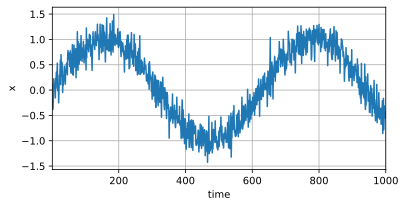

In [1]:
%matplotlib inline
from d2l import torch as d2l
import torch
import torch.nn as nn

T = 1000 # Generate a total of 1000 points
time = torch.arange(1, T + 1, dtype=torch.float32)
x = torch.sin(0.01*time) + torch.normal(0, 0.2, (T,))
d2l.plot(time, [x], 'time', 'x', xlim=[1, 1000], figsize=(6, 3))

Tiếp theo, chúng ta cần biến chuỗi thời gian này thành các đặc trưng và nhãn có thể được sử dụng để huấn luyện mạng. Dựa trên kích thước embedding  $τ$ , chúng ta ánh xạ dữ liệu thành các cặp  $y_t=x_t$  và  $\mathbf{z}_t = (x_{t-1}, \ldots, x_{t-\tau})$. Để ý kĩ, có thể thấy rằng ta sẽ mất  $τ$  điểm dữ liệu đầu tiên, vì chúng ta không có đủ  $τ$  điểm dữ liệu trong quá khứ để làm đặc trưng cho chúng. 

In [2]:
tau = 4
features = torch.zeros((T - tau, tau))
for i in range(tau):
    features[:, i] = x[i: T - tau + i]
labels = d2l.reshape(x[tau:], (-1, 1))

batch_size, n_train = 16, 600
# Only the first `n_train` example are used for traning
train_iter = d2l.load_array((features[:n_train], labels[:n_train]),
                           batch_size, is_train=True)

Ở đây chúng tôi giữ cho kiến trúc khá đơn giản: chỉ là một MLP với hai lớp được kết nối đầy đủ, kích hoạt ReLU và hàm mất mát bình phương.

In [3]:
# Funtion for initializing the weight of the network
def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_uniform_(m.weight)
        
# A simple MLP
def get_net():
    net = nn.Sequential(nn.Linear(4, 10),
                       nn.ReLU(),
                       nn.Linear(10, 1))
    net.apply(init_weights)
    return net

# Square loss
loss = nn.MSELoss()

Bây giờ chúng ta đã sẵn sàng để huấn luyện.

In [4]:
def train(net, train_iter, loss, epochs, lr):
    trainer = torch.optim.Adam(net.parameters(), lr)
    for epoch in range(epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.backward()
            trainer.step()
        print(f'epoch {epoch + 1}, '
              f'loss: {d2l.evaluate_loss(net, train_iter, loss):f}')

net = get_net()
train(net, train_iter, loss, 5, 0.01)

epoch 1, loss: 0.068052
epoch 2, loss: 0.058975
epoch 3, loss: 0.055504
epoch 4, loss: 0.055139
epoch 5, loss: 0.054802


### 8.1.3. Dự đoán của Mô hình
Vì cả hai giá trị mất mát trên tập huấn luyện và kiểm tra đều nhỏ, chúng ta kỳ vọng mô hình trên sẽ hoạt động tốt. Hãy cùng xác nhận điều này trên thực tế. Điều đầu tiên cần kiểm tra là mô hình có thể dự đoán những gì sẽ xảy ra trong bước thời gian kế tiếp tốt như thế nào.

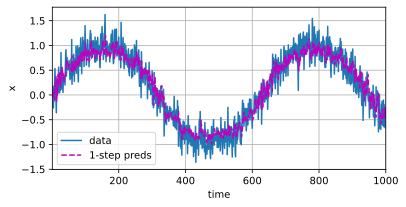

In [5]:
onestep_preds = net(features)
d2l.plot([time, time[tau:]], [d2l.numpy(x), d2l.numpy(onestep_preds)], 'time',
         'x', legend=['data', '1-step preds'], xlim=[1, 1000],
         figsize=(6, 3))

Kết quả khá tốt, đúng như những gì chúng ta mong đợi. Thậm chí sau hơn 600 mẫu quan sát, phép ước lượng vẫn trông khá tin cậy. Chỉ có một chút vấn đề: nếu chúng ta quan sát dữ liệu tới bước thời gian thứ 600, chúng ta không thể hy vọng sẽ nhận được nhãn gốc cho tất cả các dự đoán tương lai. Thay vào đó, chúng ta cần tiến lên từng bước một:

\begin{split}\begin{aligned}
x_{601} & = f(x_{600}, \ldots, x_{597}), \\
x_{602} & = f(x_{601}, \ldots, x_{598}), \\
x_{603} & = f(x_{602}, \ldots, x_{599}).
\end{aligned}\end{split}

Nói cách khác, chúng ta sẽ phải sử dụng những dự đoán của mình để đưa ra dự đoán trong tương lai. Hãy cùng xem cách này có ổn không.

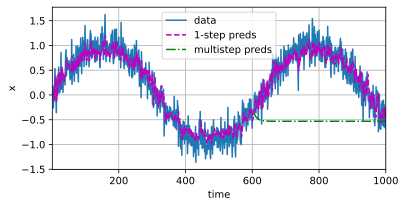

In [6]:
multistep_preds = torch.zeros(T)
multistep_preds[: n_train + tau] = x[: n_train + tau]
for i in range(n_train + tau, T):
    multistep_preds[i] = d2l.reshape(net(
        multistep_preds[i - tau: i].reshape(1, -1)), 1)

d2l.plot([time, time[tau:], time[n_train + tau:]],
         [d2l.numpy(x), d2l.numpy(onestep_preds),
          d2l.numpy(multistep_preds[n_train + tau:])], 'time',
         'x', legend=['data', '1-step preds', 'multistep preds'],
         xlim=[1, 1000], figsize=(6, 3))

Ví dụ trên cho thấy, cách này đã thất bại thảm hại. Các giá trị ước lượng rất nhanh chóng suy giảm thành một hằng số chỉ sau một vài bước. Tại sao thuật toán trên hoạt động tệ đến thế? Suy cho cùng, lý do là trên thực tế các sai số dự đoán bị chồng chất qua các bước thời gian. Cụ thể, sau bước thời gian 1 chúng ta có nhận được sai số  $\epsilon_1 = \bar\epsilon$ . Tiếp theo, đầu vào cho bước thời gian 2 bị nhiễu loạn bởi  $ϵ_1$ , do đó chúng ta nhận được sai số dự đoán $\epsilon_2 = \bar\epsilon + L \epsilon_1$. Tương tự như thế cho các bước thời gian tiếp theo. Sai số có thể phân kỳ khá nhanh khỏi các quan sát đúng. Đây là một hiện tượng phổ biến. Ví dụ, dự báo thời tiết trong 24 giờ tới có độ chính xác khá cao nhưng nó giảm đi nhanh chóng với những dự báo xa hơn quãng thời gian đó. Chúng ta sẽ thảo luận về các phương pháp để cải thiện vấn đề trên trong chương này và những chương tiếp theo.

Chúng ta hãy kiểm chứng quan sát trên bằng cách tính toán dự đoán $ k$  bước thời gian trên toàn bộ chuỗi.

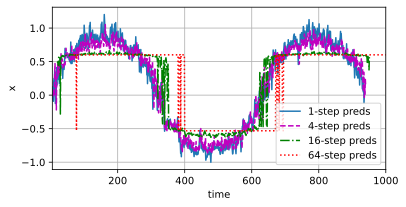

In [7]:
max_steps = 64

features = torch.zeros((T - tau - max_steps + 1, tau + max_steps))
# Column `i` (`i` < `tau`) are observations from `x` for time steps from
# `i + 1` to `i + T - tau - max_steps + 1`
for i in range(tau):
    features[:, i] = x[i: i + T - tau - max_steps + 1].T

# Column `i` (`i` >= `tau`) are the (`i - tau + 1`)-step-ahead predictions for
# time steps from `i + 1` to `i + T - tau - max_steps + 1`
for i in range(tau, tau + max_steps):
    features[:, i] = d2l.reshape(net(features[:, i - tau: i]), -1)

steps = (1, 4, 16, 64)
d2l.plot([time[tau + i - 1: T - max_steps + i] for i in steps],
         [d2l.numpy(features[:, tau + i - 1]) for i in steps], 'time', 'x',
         legend=[f'{i}-step preds' for i in steps], xlim=[5, 1000],
         figsize=(6, 3))

Điều này minh họa rõ ràng chất lượng của các ước lượng thay đổi như thế nào khi chúng ta cố gắng dự đoán xa hơn trong tương lai. Mặc dù những dự đoán có độ dài là 8 bước vẫn còn khá tốt, bất cứ kết quả dự đoán nào vượt ra ngoài khoảng đó thì khá là vô dụng.

### 8.1.4. Tóm tắt
* Các mô hình chuỗi thường yêu cầu các công cụ thống kê chuyên biệt để ước lượng. Hai lựa chọn phổ biến đó là các mô hình tự hồi quy và mô hình tự hồi quy biến tiềm ẩn.
* Sai số bị tích lũy và chất lượng của phép ước lượng suy giảm đáng kể khi mô hình dự đoán các bước thời gian xa hơn.
* Khó khăn trong phép nội suy và ngoại suy khá khác biệt. Do đó, nếu bạn có một kiểu dữ liệu chuỗi thời gian, hãy luôn để ý trình tự thời gian của dữ liệu khi huấn luyện, hay nói cách khác, không bao giờ huấn luyện trên dữ liệu thuộc về bước thời gian trong tương lai.
* Đối với các mô hình nhân quả (ví dụ, ở đó thời gian đi về phía trước), ước lượng theo chiều xuôi thường dễ dàng hơn rất nhiều so với chiều ngược lại.

### 8.1.5. Bài tập
1. Hãy cải thiện mô hình nói trên bằng cách
    * Kết hợp nhiều hơn 4 mẫu quan sát trong quá khứ? Bao nhiêu mẫu quan sát là thực sự cần thiết?
    * Bạn sẽ cần bao nhiêu mẫu nếu dữ liệu không có nhiễu? Gợi ý: bạn có thể viết  sin  và  cos  dưới dạng phương trình vi phân.
    * Có thể kết hợp các đặc trưng cũ hơn trong khi đảm bảo tổng số đặc trưng là không đổi không? Điều này có cải thiện độ chính xác không? Tại sao?
    * Thay đổi cấu trúc mạng nơ-ron và quan sát tác động của nó.
2. Nếu một nhà đầu tư muốn tìm một mã chứng khoán tốt để mua. Cô ta sẽ nhìn vào lợi nhuận trong quá khứ để quyết định mã nào có khả năng sinh lời. Điều gì có thể khiến chiến lược này trở thành sai lầm?
3. Liệu có thể áp dụng quan hệ nhân quả cho dữ liệu văn bản được không? Nếu có thì ở mức độ nào?
4. Hãy cho một ví dụ khi mô hình tự hồi quy tiềm ẩn có thể cần được dùng để nắm bắt động lực của dữ liệu.

## 8.2. Tiền Xử lý Dữ liệu Văn bản
Dữ liệu văn bản là một ví dụ điển hình của dữ liệu chuỗi. Một bài báo có thể coi là một chuỗi các từ, hoặc một chuỗi các ký tự. Dữ liệu văn bản là một dạng dữ liệu quan trọng bên cạnh dữ liệu hình ảnh được sử dụng trong cuốn sách này, phần này sẽ được dành để giải thích các bước tiền xử lý thường gặp cho loại dữ liệu này. Quá trình tiền xử lý thường bao gồm bốn bước sau:

1. Nạp dữ liệu văn bản ở dạng chuỗi ký tự vào bộ nhớ.
2. Chia chuỗi thành các token trong đó một token có thể là một từ hoặc một ký tự.
3. Xây dựng một bộ từ vựng cho các token để ánh xạ chúng thành các chỉ số (index).
4. Ánh xạ tất cả các token trong dữ liệu văn bản thành các chỉ số để dễ dàng đưa vào các mô hình.

### 8.2.1. Đọc Bộ dữ liệu
Để bắt đầu chúng ta nạp dữ liệu văn bản từ cuốn sách [Cỗ máy Thời gian (Time Machine)](https://www.gutenberg.org/ebooks/35) của tác giả H. G. Wells. Đây là một kho ngữ liệu khá nhỏ chỉ hơn  30.000  từ, nhưng nó đủ tốt cho mục đích minh họa. Nhiều bộ dữ liệu trên thực tế chứa hàng tỷ từ. Hàm sau đây đọc dữ liệu thành một danh sách các câu, mỗi câu là một chuỗi. Chúng ta bỏ qua dấu câu và chữ viết hoa.

In [8]:
#@save
import collections
from d2l import torch as d2l
import re

d2l.DATA_HUB['time_machine'] = (d2l.DATA_URL + 'timemachine.txt', 
                                '090b5e7e70c295757f55df93cb0a180b9691891a')

def read_time_machine():  #@save
    """Load the time machine dataset into a list of text lines."""
    with open(d2l.download('time_machine'), 'r') as f:
        lines = f.readlines()
    return [re.sub('[^A-Za-z]+', ' ', line).strip().lower() for line in lines]

lines = read_time_machine()
print(f'# text lines: {len(lines)}')
print(lines[0])
print(lines[10])

# text lines: 3221
the time machine by h g wells
twinkled and his usually pale face was flushed and animated the


### 8.2.2. Token hoá
Với mỗi câu, chúng ta chia nó thành một danh sách các token. Một token là một điểm dữ liệu mà mô hình sẽ huấn luyện và đưa ra dự đoán từ nó. Hàm dưới đây làm nhiệm vụ tách một câu thành các từ hoặc các ký tự, và trả về một danh sách các chuỗi đã được phân tách.

In [9]:
def tokenize(lines, token='word'):  #@save
    """Split text lines into word or character tokens."""
    if token == 'word':
        return [line.split() for line in lines]
    elif token == 'char':
        return [list(line) for line in lines]
    else:
        print('ERROR: unknown token type: ' + token)

tokens = tokenize(lines)
for i in range(11):
    print(tokens[i])

['the', 'time', 'machine', 'by', 'h', 'g', 'wells']
[]
[]
[]
[]
['i']
[]
[]
['the', 'time', 'traveller', 'for', 'so', 'it', 'will', 'be', 'convenient', 'to', 'speak', 'of', 'him']
['was', 'expounding', 'a', 'recondite', 'matter', 'to', 'us', 'his', 'grey', 'eyes', 'shone', 'and']
['twinkled', 'and', 'his', 'usually', 'pale', 'face', 'was', 'flushed', 'and', 'animated', 'the']


### 8.2.3. Bộ Từ vựng
Token kiểu chuỗi không phải là kiểu dữ liệu tiện lợi được sử dụng bởi các mô hình, thay vào đó chúng thường nhận dữ liệu đầu vào dưới dạng số. Bây giờ, chúng ta sẽ xây dựng một bộ từ điển, thường được gọi là bộ từ vựng (vocabulary), để ánh xạ chuỗi token thành các chỉ số bắt đầu từ 0. Để làm điều này, đầu tiên chúng ta lấy các token xuất hiện (không lặp lại) trong toàn bộ tài liệu, thường được gọi là kho ngữ liệu (corpus), và sau đó gán một giá trị số (chỉ số) cho mỗi token dựa trên tần suất xuất hiện của chúng. Các token có tần suất xuất hiện rất ít thường được loại bỏ để giảm độ phức tạp. Một token không xuất hiện trong kho ngữ liệu hay đã bị loại bỏ thường được ánh xạ vào một token vô danh đặc biệt ("< unk>"). Chúng ta có thể tùy chọn thêm vào các token dự trữ, ví dụ token “< pad>” được sử dụng để đệm từ, token “< bos>” để biểu thị vị trí bắt đầu của câu, và token “< eos>” để biểu thị vị trí kết thúc của câu.

In [10]:
class Vocab:  #@save
    """Vocabulary for text."""
    def __init__(self, tokens=None, min_freq=0, reserved_tokens=None):
        if tokens is None:
            tokens = []
        if reserved_tokens is None:
            reserved_tokens = []
        # Sort according to frequencies
        counter = count_corpus(tokens)
        self.token_freqs = sorted(counter.items(), key=lambda x: x[0])
        self.token_freqs.sort(key=lambda x: x[1], reverse=True)
        # The index for the unknown token is 0
        self.unk, uniq_tokens = 0, ['<unk>'] + reserved_tokens
        uniq_tokens += [token for token, freq in self.token_freqs
                        if freq >= min_freq and token not in uniq_tokens]
        self.idx_to_token, self.token_to_idx = [], dict()
        for token in uniq_tokens:
            self.idx_to_token.append(token)
            self.token_to_idx[token] = len(self.idx_to_token) - 1

    def __len__(self):
        return len(self.idx_to_token)

    def __getitem__(self, tokens):
        if not isinstance(tokens, (list, tuple)):
            return self.token_to_idx.get(tokens, self.unk)
        return [self.__getitem__(token) for token in tokens]

    def to_tokens(self, indices):
        if not isinstance(indices, (list, tuple)):
            return self.idx_to_token[indices]
        return [self.idx_to_token[index] for index in indices]

def count_corpus(tokens):  #@save
    """Count token frequencies."""
    # Here `tokens` is a 1D list or 2D list
    if len(tokens) == 0 or isinstance(tokens[0], list):
        # Flatten a list of token lists into a list of tokens
        tokens = [token for line in tokens for token in line]
    return collections.Counter(tokens)

Chúng ta xây dựng một bộ từ vựng với tập dữ liệu cỗ máy thời gian nói trên thành một kho ngữ liệu, và in ra phép ánh xạ giữa một vài token với các chỉ số của chúng.

In [11]:
vocab = Vocab(tokens)
print(list(vocab.token_to_idx.items())[:10])

[('<unk>', 0), ('the', 1), ('i', 2), ('and', 3), ('of', 4), ('a', 5), ('to', 6), ('was', 7), ('in', 8), ('that', 9)]


Sau đó, chúng ta có thể chuyển đổi từng câu vào một danh sách các chỉ số. Để minh họa một cách chi tiết, chúng ta in hai câu với các chỉ số tương ứng của chúng.

In [12]:
for i in [0, 10]:
    print('words', tokens[i])
    print('indices', vocab[tokens[i]])

words ['the', 'time', 'machine', 'by', 'h', 'g', 'wells']
indices [1, 19, 50, 40, 3130, 3058, 438]
words ['twinkled', 'and', 'his', 'usually', 'pale', 'face', 'was', 'flushed', 'and', 'animated', 'the']
indices [4399, 3, 25, 1398, 387, 113, 7, 1676, 3, 1053, 1]


### 8.2.4. Kết hợp Tất cả lại
Chúng ta đóng gói tất cả các hàm trên thành hàm load_corpus_time_machine, trả về corpus, một danh sách các chỉ số của token, và bộ từ vựng vocab của kho ngữ liệu cỗ máy thời gian. Chúng ta đã sửa đổi một vài thứ ở đây là: corpus là một danh sách đơn nhất, không phải một danh sách các danh sách token, vì chúng ta không lưu các thông tin chuỗi trong các mô hình bên dưới. Bên cạnh đó, chúng ta sẽ sử dụng các token ký tự để đơn giản hóa việc huấn luyện mô hình trong các phần sau.

In [13]:
def load_corpus_time_machine(max_tokens=-1):  #@save
    """Return token indices and the vocabulary of the time machine dataset."""
    lines = read_time_machine()
    tokens = tokenize(lines, 'char')
    vocab = Vocab(tokens)
    # Since each text line in the time machine dataset is not necessarily a
    # sentence or a paragraph, flatten all the text lines into a single list
    corpus = [vocab[token] for line in tokens for token in line]
    if max_tokens > 0:
        corpus = corpus[:max_tokens]
    return corpus, vocab

corpus, vocab = load_corpus_time_machine()
len(corpus), len(vocab)

(170580, 28)

### 8.2.5. Tóm tắt
* Văn bản là một dạng dữ liệu trình tự quan trọng.
* Chúng ta đã tiền xử lý các tài liệu văn bản bằng cách token hóa chúng thành các từ hoặc ký tự, và sau đó ánh xạ chúng thành các chỉ số tương ứng.

### 8.2.6. Bài tập
Token hóa là một bước tiền xử lý quan trọng. Mỗi ngôn ngữ có đều có các cách làm khác nhau. Hãy thử tìm thêm 3 phương pháp thường dùng để token hóa các câu.

## 8.3. Mô hình Ngôn ngữ và Tập dữ liệu
Section 8.2 đã trình bày cách ánh xạ dữ liệu văn bản sang token, những token này có thể được xem như một chuỗi thời gian của các quan sát rời rạc. Giả sử văn bản độ dài  $T$  có dãy token là  $x_1, x_2, \ldots, x_T$ , thì  $x_t(1 \leq t \leq T)$ có thể coi là đầu ra (hoặc nhãn) tại bước thời gian  t . Khi đã có chuỗi thời gian trên, mục tiêu của mô hình ngôn ngữ là ước tính xác suất của

<center>$p(x_1, x_2, \ldots, x_T).$</center>
 
Mô hình ngôn ngữ vô cùng hữu dụng. Chẳng hạn, một mô hình lý tưởng có thể tự tạo ra văn bản tự nhiên, chỉ bằng cách chọn một từ  $w_t$  tại thời điểm $ t$  với $w_t \sim p(w_t \mid w_{t-1}, \ldots, w_1)$ . Khác hoàn toàn với việc chỉ gõ phím ngẫu nhiên như trong định lý *con khỉ vô hạn (infinite monkey theorem)*, văn bản được sinh ra từ mô hình này giống ngôn ngữ tự nhiên, giống tiếng Anh chẳng hạn. Hơn nữa, mô hình đủ khả năng tạo ra một đoạn hội thoại có ý nghĩa mà chỉ cần dựa vào đoạn hội thoại trước đó. Trên thực tế, còn rất xa để thiết kế được hệ thống như vậy, vì mô hình sẽ cần hiểu văn bản hơn là chỉ tạo ra nội dung đúng ngữ pháp.

Tuy nhiên, mô hình ngôn ngữ vẫn rất hữu dụng ngay cả khi còn hạn chế. Chẳng hạn, cụm từ “nhận dạng giọng nói” và “nhân gian rộng lối” có phát âm khá giống nhau. Điều này có thể gây ra sự mơ hồ trong việc nhận dạng giọng nói, nhưng có thể dễ dàng được giải quyết với một mô hình ngôn ngữ. Mô hình sẽ loại bỏ ngay phương án thứ hai do mang ý nghĩa kì lạ. Tương tự, một thuật toán tóm tắt tài liệu nên phân biệt được rằng câu “chó cắn người” xuất hiện thường xuyên hơn nhiều so với “người cắn chó”, hay như “Cháu muốn ăn bà ngoại” nghe khá kinh dị trong khi “Cháu muốn ăn, bà ngoại” lại là bình thường.

### 8.3.1. Ước tính một Mô hình Ngôn ngữ
Làm thế nào để mô hình hóa một tài liệu hay thậm chí là một chuỗi các từ? Ta có thể sử dụng cách phân tích đã dùng trong mô hình chuỗi ở phần trước. Bắt đầu bằng việc áp dụng quy tắc xác suất cơ bản sau:

<center>$p(w_1, w_2, \ldots, w_T) = p(w_1) \prod_{t=2}^T p(w_t  \mid  w_1, \ldots, w_{t-1}).$</center>
 
Ví dụ, xác suất của chuỗi văn bản chứa bốn token bao gồm các từ và dấu chấm câu được tính như sau:

$p(\mathrm{Statistics}, \mathrm{is}, \mathrm{fun}, \mathrm{.}) =  p(\mathrm{Statistics}) p(\mathrm{is}  \mid  \mathrm{Statistics}) p(\mathrm{fun}  \mid  \mathrm{Statistics}, \mathrm{is}) p(\mathrm{.}  \mid  \mathrm{Statistics}, \mathrm{is}, \mathrm{fun})$

Để tính toán mô hình ngôn ngữ, ta cần tính xác suất các từ và xác suất có điều kiện của một từ khi đã có vài từ trước đó. Đây chính là các tham số của mô hình ngôn ngữ. Ở đây chúng ta giả định rằng, tập dữ liệu huấn luyện là một kho ngữ liệu lớn, chẳng hạn như là tất cả các mục trong Wikipedia của [Dự án Gutenberg](https://en.wikipedia.org/wiki/Project_Gutenberg), hoặc tất cả văn bản được đăng trên mạng. Xác suất riêng lẻ của từng từ có thể tính bằng tần suất của từ đó trong tập dữ liệu huấn luyện.

Ví dụ,  $p(Statistics)$  có thể được tính là xác suất của bất kỳ câu nào bắt đầu bằng “statistics”. Một cách thiếu chính xác hơn là đếm tất cả số lần xuất hiện của ”statistics” và chia số lần đó cho tổng số từ trong kho ngữ liệu văn bản. Cách làm này khá hiệu quả, đặc biệt là với các từ xuất hiện thường xuyên. Tiếp theo, ta tính

<center>$\hat{p}(\mathrm{is} \mid \mathrm{Statistics}) = \frac{n(\mathrm{Statistics, is})}{n(\mathrm{Statistics})}.$ </center>

Ở đây  $n(w)$  và  $n(w,w′)$  lần lượt là số lần xuất hiện của các từ đơn và cặp từ ghép. Đáng tiếc là việc ước tính xác suất của một cặp từ thường khó khăn hơn, bởi vì sự xuất hiện của cặp từ “Statistics is” hiếm khi xảy ra hơn. Đặc biệt, với các cụm từ ít đi cùng nhau, rất khó tìm đủ số lần xuất hiện để ước tính chính xác. Mọi thứ thậm chí sẽ khó hơn đối với các cụm ba từ trở lên. Sẽ có nhiều cụm ba từ hợp lý mà hầu như không hề xuất hiện trong tập dữ liệu. Trừ khi có giải pháp để đánh trọng số khác không cho các tổ hợp từ đó, nếu không sẽ không thể sử dụng chúng trong một mô hình ngôn ngữ. Nếu kích thước tập dữ liệu nhỏ hoặc nếu các từ rất hiếm, chúng ta thậm chí có thể không tìm thấy nổi một lần xuất hiện của các tổ hợp từ đó.

Một kỹ thuật phổ biến là làm mượt Laplace (Laplace smoothing). Chúng ta đã biết kỹ thuật này khi thảo luận về Naive Bayes trong Section 18.9, với giải pháp là cộng thêm một hằng số nhỏ vào tất cả các số đếm như sau

<center>$\begin{split}\begin{aligned}
\hat{p}(w) & = \frac{n(w) + \epsilon_1/m}{n + \epsilon_1}, \\
\hat{p}(w' \mid w) & = \frac{n(w, w') + \epsilon_2 \hat{p}(w')}{n(w) + \epsilon_2}, \\
\hat{p}(w'' \mid w',w) & = \frac{n(w, w',w'') + \epsilon_3 \hat{p}(w',w'')}{n(w, w') + \epsilon_3}.
\end{aligned}\end{split}$</center>

Ở đây các hệ số  $ϵ_i>0$  xác định mức độ ảnh hưởng của chuỗi ngắn hơn khi ước tính chuỗi dài hơn,  m  là tổng số từ trong tập văn bản. Công thức trên là một biến thể khá nguyên thủy của kỹ thuật làm mượt Kneser-Ney và Bayesian phi tham số. Xem [Wood et al., 2011](https://www.stats.ox.ac.uk/~teh/research/compling/WooGasArc2011a.pdf) để biết thêm chi tiết. Thật không may, các mô hình như vậy là bất khả thi vì những lý do sau. Đầu tiên, chúng ta cần lưu trữ tất cả các số đếm. Thứ hai, các mô hình hoàn toàn bỏ qua ý nghĩa của các từ. Chẳng hạn, danh từ *“mèo”(“cat”)* và tính từ *“thuộc về mèo”(“feline”)* nên xuất hiện trong các ngữ cảnh có liên quan đến nhau. Rất khó để thêm các ngữ cảnh bổ trợ vào các mô hình đó, trong khi các mô hình ngôn ngữ dựa trên học sâu hoàn toàn có thể làm được. Cuối cùng, các chuỗi từ dài gần như hoàn toàn mới lạ, do đó một mô hình chỉ đơn giản đếm tần số của các chuỗi từ đã thấy trước đó sẽ hoạt động rất kém.

### 8.3.2. Mô hình Markov và  n -grams
Trước khi thảo luận các giải pháp sử dụng học sâu, chúng ta sẽ giải thích một số thuật ngữ và khái niệm. Hãy nhớ lại mô hình Markov đề cập ở phần trước, và áp dụng để mô hình hóa ngôn ngữ. Một phân phối trên các chuỗi thỏa mãn điều kiện Markov bậc nhất nếu $p(w_{t+1} \mid w_t, \ldots, w_1) = p(w_{t+1} \mid w_t)$ . Những bậc cao hơn tương ứng với những chuỗi phụ thuộc dài hơn. Do đó chúng ta có thể áp dụng các phép xấp xỉ để mô hình hóa một chuỗi:

<center>$\begin{split}\begin{aligned}
p(w_1, w_2, w_3, w_4) &=  p(w_1) p(w_2) p(w_3) p(w_4),\\
p(w_1, w_2, w_3, w_4) &=  p(w_1) p(w_2  \mid  w_1) p(w_3  \mid  w_2) p(w_4  \mid  w_3),\\
p(w_1, w_2, w_3, w_4) &=  p(w_1) p(w_2  \mid  w_1) p(w_3  \mid  w_1, w_2) p(w_4  \mid  w_2, w_3).
\end{aligned}\end{split}$</center>
 
Các công thức xác suất liên quan đến một, hai và ba biến được gọi là các mô hình *unigram*, *bigram* và *trigram*. Sau đây, chúng ta sẽ tìm hiểu cách thiết kế các mô hình tốt hơn.

### 8.3.3. Thống kê Ngôn ngữ Tự nhiên
Hãy cùng xem mô hình hoạt động thế nào trên dữ liệu thực tế. Chúng ta sẽ xây dựng bộ từ vựng dựa trên tập dữ liệu “cỗ máy thời gian” tương tự như ở Section 8.2 và in ra  10  từ có tần suất xuất hiện cao nhất.

In [14]:
from d2l import torch as d2l
import torch
import random

tokens = d2l.tokenize(d2l.read_time_machine())
# Since each text line is not necessisarily a sentence or a paragraph, we
# concatenate all text lines
corpus = [token for line in tokens for token in line]
vocab = d2l.Vocab(corpus)
vocab.token_freqs[:10]

[('the', 2261),
 ('i', 1267),
 ('and', 1245),
 ('of', 1155),
 ('a', 816),
 ('to', 695),
 ('was', 552),
 ('in', 541),
 ('that', 443),
 ('my', 440)]

Có thể thấy những từ xuất hiện nhiều nhất không có gì đáng chú ý. Các từ này được gọi là từ dừng (stop words) và vì thế chúng thường được lọc ra. Dù vậy, những từ này vẫn có nghĩa và ta vẫn sẽ sử dụng chúng. Tuy nhiên, rõ ràng là tần số của từ suy giảm khá nhanh. Từ phổ biến thứ  10  xuất hiện ít hơn, chỉ bằng  1/5  lần so với từ phổ biến nhất. Để hiểu rõ hơn, chúng ta sẽ vẽ đồ thị tần số của từ.

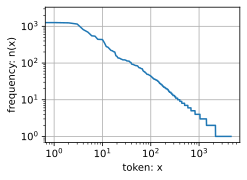

In [15]:
freqs = [freq for token, freq in vocab.token_freqs]
d2l.plot(freqs, xlabel='token: x', ylabel='frequency: n(x)', 
        xscale='log', yscale='log')

Chúng ta đang tiến gần tới một đặc điểm cơ bản: tần số của từ suy giảm nhanh chóng theo một cách được xác định rõ. Ngoại trừ bốn từ đầu tiên (‘the’, ‘i’, ‘and’, ‘of’), tất cả các từ còn lại đi theo một đường thẳng trên biểu đồ thang log. Theo đó các từ tuân theo [định luật Zipf](https://en.wikipedia.org/wiki/Zipf's_law), tức là tần suất xuất hiện của từ được xác định bởi

<center>$n_i \propto \frac{1}{i^\alpha}$, với $\log n_i = -\alpha \log i + c,$</center>
 
Điều này khiến chúng ta cần suy nghĩ kĩ khi mô hình hóa các từ bằng cách đếm và kỹ thuật làm mượt. Rốt cuộc, chúng ta sẽ ước tính quá cao những từ có tần suất xuất hiện thấp. Vậy còn các tổ hợp từ khác như 2-gram, 3-gram và nhiều hơn thì sao? Hãy xem liệu tần số của bigram có tương tự như unigram hay không.

In [16]:
bigram_tokens = [pair for pair in zip(corpus[:-1], corpus[1:])]
bigram_vocab = d2l.Vocab(bigram_tokens)
bigram_vocab.token_freqs[:10]

[(('of', 'the'), 309),
 (('in', 'the'), 169),
 (('i', 'had'), 130),
 (('i', 'was'), 112),
 (('and', 'the'), 109),
 (('the', 'time'), 102),
 (('it', 'was'), 99),
 (('to', 'the'), 85),
 (('as', 'i'), 78),
 (('of', 'a'), 73)]

Có một điều đáng chú ý ở đây. 9 trong số 10 cặp từ thường xuyên xuất hiện là các từ dừng và chỉ có một là liên quan đến cuốn sách — cặp từ “the time”. Hãy xem tần số của trigram có tương tự hay không.

In [17]:
trigram_tokens = [triple for triple in zip(
    corpus[:-2], corpus[1:-1], corpus[2:])]
trigram_vocab = d2l.Vocab(trigram_tokens)
trigram_vocab.token_freqs[:10]

[(('the', 'time', 'traveller'), 59),
 (('the', 'time', 'machine'), 30),
 (('the', 'medical', 'man'), 24),
 (('it', 'seemed', 'to'), 16),
 (('here', 'and', 'there'), 15),
 (('it', 'was', 'a'), 15),
 (('i', 'did', 'not'), 14),
 (('seemed', 'to', 'me'), 14),
 (('i', 'began', 'to'), 13),
 (('i', 'saw', 'the'), 13)]

Cuối cùng, hãy quan sát biểu đồ tần số token của các mô hình: unigram, bigram, và trigram.

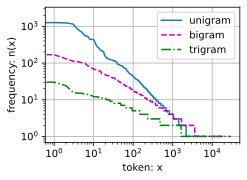

In [18]:
bigram_freqs = [freq for token, freq in bigram_vocab.token_freqs]
trigram_freqs = [freq for token, freq in trigram_vocab.token_freqs]
d2l.plot([freqs, bigram_freqs, trigram_freqs], xlabel='token: x',
         ylabel='frequency: n(x)', xscale='log', yscale='log',
         legend=['unigram', 'bigram', 'trigram'])

Có vài điều khá thú vị ở biểu đồ này. Thứ nhất, ngoài unigram, các cụm từ cũng tuân theo định luật Zipf, với số mũ thấp hơn tùy vào chiều dài cụm từ. Thứ hai, số lượng các n-gram độc nhất là không nhiều. Điều này có thể liên quan đến số lượng lớn các cấu trúc trong ngôn ngữ. Thứ ba, rất nhiều n-gram hiếm khi xuất hiện, khiến phép làm mượt Laplace không thích hợp để xây dựng mô hình ngôn ngữ. Thay vào đó, chúng ta sẽ sử dụng các mô hình học sâu.

### 8.3.4. Chuẩn bị Dữ liệu Huấn luyện
Giả sử cần sử dụng mạng nơ-ron để huấn luyện mô hình ngôn ngữ. Với tính chất tuần tự của dữ liệu chuỗi, làm thế nào để đọc ngẫu nhiên các mini-batch gồm các mẫu và nhãn? Ví dụ đơn giản trong Section 8.1 đã giới thiệu một cách thực hiện. Hãy tổng quát hóa cách làm này một chút.

Fig. 8.3.1, biểu diễn các cách để chia một câu thành các 5-gram, ở đây mỗi token là một ký tự. Ta có thể chọn tùy ý độ dời ở vị trí bắt đầu.

![](images/timemachine-5gram.svg)

<center>Fig. 8.3.1 Các độ dời khác nhau dẫn đến các chuỗi con khác nhau khi phân tách văn bản.</center>

Chúng ta nên chọn giá trị độ dời nào? Trong thực tế, tất cả các giá trị đó đều tốt như nhau. Nhưng nếu chọn tất cả các giá trị độ dời, dữ liệu sẽ khá dư thừa do trùng lặp lẫn nhau, đặc biệt trong trường hợp các chuỗi rất dài. Việc chỉ chọn một tập ngẫu nhiên các vị trí đầu cũng không tốt vì không đảm bảo sẽ bao quát đồng đều cả mảng. Ví dụ, nếu lấy ngẫu nhiên có hoàn lại  n  phần tử từ một tập có  n  phần tử, xác suất một phần tử cụ thể không được chọn là  $(1−1/n)n→e−1$ . Nghĩa là ta không thể kỳ vọng vào sự bao quát đồng đều, ngay cả khi hoán vị ngẫu nhiên một tập giá trị độ dời. Thay vào đó, có thể sử dụng một cách đơn giản để có được cả *tính bao quát* và *tính ngẫu nhiên*, đó là: chọn một độ dời ngẫu nhiên, sau đó sử dụng tuần tự các giá trị tiếp theo. Điều này được mô tả trong phép lấy mẫu ngẫu nhiên và phép phân tách tuần tự dưới đây.

### 8.3.4.1. Lấy Mẫu Ngẫu nhiên
Đoạn mã sau tạo ngẫu nhiên một minibatch dữ liệu. Ở đây, kích thước batch `batch_size` biểu thị số mẫu trong mỗi minibatch, `num_steps` biểu thị chiều dài mỗi mẫu (là số bước thời gian trong trường hợp chuỗi thời gian). Trong phép lấy mẫu ngẫu nhiên, mỗi mẫu là một chuỗi tùy ý được lấy ra từ chuỗi gốc. Hai minibatch ngẫu nhiên liên tiếp không nhất thiết phải liền kề nhau trong chuỗi góc. Mục tiêu của ta là dự đoán phần tử tiếp theo dựa trên các phần tử đã thấy cho đến hiện tại, do đó nhãn của một mẫu chính là mẫu đó dịch chuyển sang phải một phần tử.

In [19]:
def seq_data_iter_random(corpus, batch_size, num_steps):  #@save
    """Generate a minibatch of subsequences using random sampling."""
    # Start with a random offset to partition a sequence
    corpus = corpus[random.randint(0, num_steps):]
    # Subtract 1 since we need to account for labels
    num_subseqs = (len(corpus) - 1) // num_steps
    # The starting indices for subsequences of length `num_steps`
    initial_indices = list(range(0, num_subseqs * num_steps, num_steps))
    # In random sampling, the subsequences from two adjacent random
    # minibatches during iteration are not necessarily adjacent on the
    # original sequence
    random.shuffle(initial_indices)

    def data(pos):
        # Return a sequence of length `num_steps` starting from `pos`
        return corpus[pos: pos + num_steps]

    num_subseqs_per_example = num_subseqs // batch_size
    for i in range(0, batch_size * num_subseqs_per_example, batch_size):
        # Here, `initial_indices` contains randomized starting indices for
        # subsequences
        initial_indices_per_batch = initial_indices[i: i + batch_size]
        X = [data(j) for j in initial_indices_per_batch]
        Y = [data(j + 1) for j in initial_indices_per_batch]
        yield torch.tensor(X), torch.tensor(Y)

Hãy tạo ra một chuỗi từ 0 đến 29, rồi sinh các minibatch từ chuỗi đó với kích thước batch là 2 và số bước thời gian là 6. Nghĩa là tùy vào độ dời, ta có thể sinh tối đa 4 hoặc 5 cặp  $(x,y)$ . Với kích thước batch bằng 2, ta thu được 2 minibatch.

In [20]:
my_seq = list(range(30))
for X, Y in seq_data_iter_random(my_seq, batch_size=2, num_steps=6):
    print('X: ', X, '\nY:', Y)

X:  tensor([[ 1,  2,  3,  4,  5,  6],
        [ 7,  8,  9, 10, 11, 12]]) 
Y: tensor([[ 2,  3,  4,  5,  6,  7],
        [ 8,  9, 10, 11, 12, 13]])
X:  tensor([[13, 14, 15, 16, 17, 18],
        [19, 20, 21, 22, 23, 24]]) 
Y: tensor([[14, 15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24, 25]])


### 8.3.4.2. Phân tách Tuần tự
Ngoài phép lấy mẫu ngẫu nhiên từ chuỗi gốc, chúng ta cũng có thể làm hai minibatch ngẫu nhiên liên tiếp có vị trí liền kề nhau trong chuỗi gốc.

In [23]:
def seq_data_iter_sequential(corpus, batch_size, num_steps):  #@save
    """Generate a minibatch of subsequences using sequential partitioning."""
    # Start with a random offset to partition a sequence
    offset = random.randint(0, num_steps)
    num_tokens = ((len(corpus) - offset - 1) // batch_size) * batch_size
    Xs = torch.tensor(corpus[offset: offset + num_tokens])
    Ys = torch.tensor(corpus[offset + 1: offset + 1 + num_tokens])
    Xs, Ys = Xs.reshape(batch_size, -1), Ys.reshape(batch_size, -1)
    num_batches = Xs.shape[1] // num_steps
    for i in range(0, num_batches * num_steps, num_steps):
        X = Xs[:, i: i + num_steps]
        Y = Ys[:, i: i + num_steps]
        yield X, Y

Sử dụng các đối số như ở trên, ta sẽ in đầu vào X và nhãn Y cho mỗi minibatch sau khi phân tách tuần tự. Hai minibatch liên tiếp sẽ có vị trí trên chuỗi ban đầu liền kề nhau.

In [24]:
for X, Y in seq_data_iter_sequential(my_seq, batch_size=2, num_steps=5):
    print('X: ', X, '\nY:', Y)

X:  tensor([[ 0,  1,  2,  3,  4],
        [14, 15, 16, 17, 18]]) 
Y: tensor([[ 1,  2,  3,  4,  5],
        [15, 16, 17, 18, 19]])
X:  tensor([[ 5,  6,  7,  8,  9],
        [19, 20, 21, 22, 23]]) 
Y: tensor([[ 6,  7,  8,  9, 10],
        [20, 21, 22, 23, 24]])


Hãy gộp hai hàm lấy mẫu theo hai cách trên vào một lớp để duyệt dữ liệu ở các phần sau.

In [25]:
class SeqDataLoader:  #@save
    """An iterator to load sequence data."""
    def __init__(self, batch_size, num_steps, use_random_iter, max_tokens):
        if use_random_iter:
            self.data_iter_fn = d2l.seq_data_iter_random
        else:
            self.data_iter_fn = d2l.seq_data_iter_sequential
        self.corpus, self.vocab = d2l.load_corpus_time_machine(max_tokens)
        self.batch_size, self.num_steps = batch_size, num_steps

    def __iter__(self):
        return self.data_iter_fn(self.corpus, self.batch_size, self.num_steps)

Cuối cùng, ta sẽ viết hàm `load_data_time_machine` trả về cả `iterator` dữ liệu và bộ từ vựng để sử dụng như các hàm `load_data` khác.

In [26]:
# Saved in the d2l package for later use
def load_data_time_machine(batch_size, num_steps, use_random_iter=False,
                           max_tokens=10000):
    data_iter = SeqDataLoader(
        batch_size, num_steps, use_random_iter, max_tokens)
    return data_iter, data_iter.vocab

### 8.3.5. Tóm tắt
* Mô hình ngôn ngữ là một kĩ thuật quan trọng trong xử lý ngôn ngữ tự nhiên.
* n -gram là một mô hình khá tốt để xử lý các chuỗi dài bằng cách cắt giảm số phụ thuộc.
* Vấn đề của các chuỗi dài là chúng rất hiếm hoặc thậm chí không bao giờ xuất hiện.
* Định luật Zipf không chỉ mô tả phân phối từ 1-gram mà còn cả các  n -gram khác.
* Có nhiều cấu trúc trong ngôn ngữ nhưng tần suất xuất hiện lại không đủ cao, để xử lý các tổ hợp từ hiếm ta sử dụng làm mượt Laplace.
* Hai giải pháp chủ yếu cho bài toán phân tách chuỗi là lấy mẫu ngẫu nhiên và phân tách tuần tự.
* Nếu tài liệu đủ dài, việc lãng phí một chút và loại bỏ các minibatch rỗng một nửa là điều chấp nhận được.

### 8.3.6. Bài tập
1. Giả sử có  100.000  từ trong tập dữ liệu huấn luyện. Mô hình 4-gram cần phải lưu trữ bao nhiêu tần số của từ đơn và cụm từ liền kề?
2. Hãy xem lại các ước lượng xác suất đã qua làm mượt. Tại sao chúng không chính xác? Gợi ý: chúng ta đang xử lý một chuỗi liền kề chứ không phải riêng lẻ.
3. Bạn sẽ mô hình hóa một cuộc đối thoại như thế nào?
4. Hãy ước tính luỹ thừa của định luật Zipf cho 1-gram, 2-gram, và 3-gram.
5. Hãy thử tìm các cách lấy mẫu minibatch khác.
6. Tại sao việc lấy giá trị độ dời ngẫu nhiên lại là một ý tưởng hay?
* Liệu việc đó có làm các chuỗi dữ liệu văn bản tuân theo phân phối đều một cách hoàn hảo không?
* Phải làm gì để có phân phối đều hơn?
7. Những vấn đề gì sẽ nảy sinh khi lấy mẫu minibatch từ một câu hoàn chỉnh? Có lợi ích gì khi lấy mẫu một câu hoàn chỉnh?

## 8.4. Mạng nơ-ron Hồi tiếp
Section 8.3 đã giới thiệu mô hình  n -gram, trong đó xác suất có điều kiện của từ  $x_t$  tại vị trí  $t$  chỉ phụ thuộc vào  $n−1$  từ trước đó. Nếu muốn kiểm tra ảnh hưởng có thể có của các từ ở trước vị trí  $t−(n−1)$  đến từ  $x_t$ , ta cần phải tăng  $n$ . Tuy nhiên, cùng với đó số lượng tham số của mô hình cũng sẽ tăng lên theo hàm mũ, vì ta cần lưu  $|V|^n$  giá trị với một từ điển  $V$  nào đó. Do đó, thay vì mô hình hóa $p(x_t \mid x_{t-1}, \ldots, x_{t-n+1})$ , sẽ tốt hơn nếu ta sử dụng *mô hình biến tiềm ẩn (latent variable model)*, trong đó

<center>$p(x_t \mid x_{t-1}, \ldots, x_1) \approx p(x_t \mid x_{t-1}, h_{t})$</center>
 
$h_t$  được gọi là *biến tiềm ẩn* và nó lưu trữ thông tin của chuỗi. Biến tiềm ẩn còn được gọi là *biến ẩn (hidden variable)*, *trạng thái ẩn (hidden state)* hay *biến trạng thái ẩn (hidden state variable)*. Trạng thái ẩn tại thời điểm  $t$  có thể được tính dựa trên cả đầu vào  $x_t$  và trạng thái ẩn  $h_{t−1}$  như sau

<center>$h_t = f(x_{t}, h_{t-1})$</center>
 
Với một hàm  $f$  đủ mạnh, mô hình biến tiềm ẩn không phải là một phép xấp xỉ. Sau cùng,  $h_t$  có thể chỉ đơn thuần lưu lại tất cả dữ liệu đã quan sát được cho đến thời điểm hiện tại. Điều này đã được thảo luận tại Section 8.1. Tuy nhiên nó có thể khiến cho việc tính toán và lưu trữ trở nên nặng nề.

Chú ý rằng ta cũng sử dụng  $h$  để kí hiệu số lượng nút ẩn trong một tầng ẩn. Tầng ẩn và trạng thái ẩn là hai khái niệm rất khác nhau. Tầng ẩn, như đã được giải thích, là các tầng không thể nhìn thấy trong quá trình đi từ đầu vào đến đầu ra. Trạng thái ẩn, về mặt kỹ thuật là đầu vào của một bước tính toán tại một thời điểm xác định. Chúng chỉ có thể được tính dựa vào dữ liệu tại các vòng lặp trước đó. Về điểm này, trạng thái ẩn giống với các mô hình biến tiềm ẩn trong thống kê như mô hình phân cụm hoặc mô hình chủ đề (*topic model*), trong đó các cụm tác động đến đầu ra nhưng không thể quan sát trực tiếp.

Mạng nơ-ron hồi tiếp là mạng nơ-ron với các trạng thái ẩn. Trước khi tìm hiểu mô hình này, hãy cùng xem lại perceptron đa tầng tại Section 4.1.

### 8.4.1. Mạng Hồi tiếp không có Trạng thái ẩn
Xét một perception đa tầng với một tầng ẩn duy nhất. Giả sử ta có một minibatch  $\mathbf{X} \in \mathbb{R}^{n \times d}$  với  $n$  mẫu và  $d$  đầu vào. Gọi hàm kích hoạt của tầng ẩn là  $ϕ$ . Khi đó, đầu ra của tầng ẩn  $\mathbf{H} \in \mathbb{R}^{n \times h}$ được tính như sau

<center>$\mathbf{H} = \phi(\mathbf{X} \mathbf{W}_{xh} + \mathbf{b}_h).$</center>
 
Trong đó,  $\mathbf{W}_{xh} \in \mathbb{R}^{d \times h}$  là tham số trọng số,  $\mathbf{b}_h \in \mathbb{R}^{1 \times h}$  là hệ số điều chỉnh và  $h$  là số nút ẩn của tầng ẩn.

Biến ẩn $\mathbf{H}$ được sử dụng làm đầu vào của tầng đầu ra. Tầng đầu ra được tính toán bởi

<center>$\mathbf{O} = \mathbf{H} \mathbf{W}_{hq} + \mathbf{b}_q.$</center>
 
Trong đó  $\mathbf{O} \in \mathbb{R}^{n \times q}$  là biến đầu ra,  $\mathbf{W}_{hq} \in \mathbb{R}^{h \times q}$  là tham số trọng số và  $\mathbf{b}_q \in \mathbb{R}^{1 \times q}$  là hệ số điều chỉnh của tầng đầu ra. Nếu đang giải quyết bài toán phân loại, ta có thể sử dụng  $softmax(O)$  để tính phân phối xác suất của các lớp đầu ra.

Do bài toán này hoàn toàn tương tự với bài toán hồi quy được giải quyết trong Section 8.1, ta sẽ bỏ qua các chi tiết ở đây. Và chỉ cần biết thêm rằng ta có thể chọn các cặp  $(x_t,x_{t−1})$  một cách ngẫu nhiên và ước lượng các tham số  $\mathbf{W}$  và  $\mathbf{b}$ của mạng thông qua phép vi phân tự động và hạ gradient ngẫu nhiên.

### 8.4.2. Mạng Hồi tiếp có Trạng thái ẩn
Vấn đề sẽ khác đi hoàn toàn nếu ta sử dụng các trạng thái ẩn. Hãy xem xét cấu trúc này một cách chi tiết hơn. Chúng ta thường gọi vòng lặp thứ  $t$  là thời điểm  $t$  trong thuật toán tối ưu, nhưng trong mạng nơ-ron hồi tiếp, thời điểm  $t$  lại tương ứng với các bước trong một vòng lặp. Giả sử trong một vòng lặp ta có  $\mathbf{X}_t \in \mathbb{R}^{n \times d}$ ,  $t=1,…,T$ . Và  $\mathbf{H}_t \in \mathbb{R}^{n \times h}$  là biến ẩn tại bước thời gian  $t$  của chuỗi. Khác với perceptron đa tầng, ở đây ta lưu biến ẩn  $\mathbf{H}_{t-1}$  từ bước thời gian trước đó và dùng thêm một tham số trọng số mới $\mathbf{W}_{hh} \in \mathbb{R}^{h \times h}$ để mô tả việc sử dụng biến ẩn của bước thời gian trước đó trong bước thời gian hiện tại. Cụ thể, biến ẩn của bước thời gian hiện tại được xác định bởi đầu vào của bước thời gian hiện tại cùng với biến ẩn của bước thời gian trước đó:

<center>$\mathbf{H}_t = \phi(\mathbf{X}_t \mathbf{W}_{xh} + \mathbf{H}_{t-1} \mathbf{W}_{hh}  + \mathbf{b}_h)$</center>
 
So với (8.4.3), phương trình này có thêm  $\mathbf{H}_{t-1} \mathbf{W}_{hh}$ . Từ mối quan hệ giữa các biến ẩn  $\mathbf{H}_t$  và  $\mathbf{H}_{t-1}$  của các bước thời gian liền kề, ta biết rằng chúng đã lưu lại thông tin lịch sử của chuỗi cho tới bước thời gian hiện tại, giống như trạng thái hay bộ nhớ hiện thời của mạng nơ-ron. Vì vậy, một biến ẩn còn được gọi là một trạng thái ẩn (hidden state). Vì trạng thái ẩn ở bước thời gian hiện tại và trước đó đều có cùng định nghĩa, phương trình trên được tính toán theo phương pháp hồi tiếp. Và đây cũng là lý do dẫn đến cái tên *mạng nơ-ron hồi tiếp (Recurrent Neural Network - RNN)*.

Có rất nhiều phương pháp xây dựng RNN. Trong số đó, phổ biến nhất là RNN có trạng thái ẩn như định nghĩa ở phương trình trên. Tại bước thời gian  $t$ , tầng đầu ra trả về kết quả tính toán tương tự như trong perceptron đa tầng:

<center>$\mathbf{O}_t = \mathbf{H}_t \mathbf{W}_{hq} + \mathbf{b}_q$</center>
 
Các tham số trong mô hình RNN bao gồm trọng số  $\mathbf{W}_{xh} \in \mathbb{R}^{d \times h}, \mathbf{W}_{hh} \in \mathbb{R}^{h \times h}$ của tầng ẩn với hệ số điều chỉnh $\mathbf{b}_h \in \mathbb{R}^{1 \times h}$, và trọng số $\mathbf{W}_{hq} \in \mathbb{R}^{h \times q}$ của tầng đầu ra với hệ số điều chỉnh $\mathbf{b}_q \in \mathbb{R}^{1 \times q}$. Lưu ý rằng RNN luôn sử dùng cùng một bộ tham số mô hình cho dù tính toán ở các bước thời gian khác nhau. Vì thế, việc tăng số bước thời gian không làm tăng lượng tham số mô hình của RNN.

Fig. 8.4.1 minh họa logic tính toán của một RNN tại ba bước thời gian liền kề. Tại bước thời gian  $t$ , sau khi nối đầu vào  $\mathbf{X}_t$  với trạng thái ẩn $\mathbf{H}_{t-1}$ tại bước thời gian trước đó, ta có thể coi nó như đầu vào của một tầng kết nối đầy đủ với hàm kích hoạt $\phi$.
Đầu ra của tầng kết nối đầy đủ chính là trạng thái ẩn ở bước thời gian hiện tại $\mathbf{H}_t$ . Tham số mô hình ở bước thời gian hiện tại là  $\mathbf{W}_{xh}$  nối với  $\mathbf{W}_{hh}$ , cùng với hệ số điều chỉnh $\mathbf{b}_h$. Trạng thái ẩn ở bước thời gian hiện tại  $t$ , $\mathbf{H}_t$  được sử dụng để tính trạng thái ẩn  $\mathbf{H}_{t+1}$  tại bước thời gian kế tiếp  $t+1$ . Hơn nữa,  $\mathbf{H}_t$  sẽ trở thành đầu vào cho tầng đầu ra  $\mathbf{O}_t$ , một tầng kết nối đầy đủ, ở bước thời gian hiện tại.

![](images/rnn.svg)

### 8.4.3. Các bước trong một Mô hình Ngôn ngữ
Bây giờ hãy cùng xem cách xây dựng mô hình ngôn ngữ bằng RNN. Vì dùng từ thường dễ hiểu hơn dùng chữ, nên các từ sẽ được dùng làm đầu vào trong ví dụ đơn giản này.
Đặt kích thước minibatch là 1, với chuỗi văn bản là phần đầu của tập dữ liệu: “the time machine by H. G. Wells”. Fig. 8.4.2 minh họa cách ước lượng từ tiếp theo dựa trên từ hiện tại và các từ trước đó. Trong quá trình huấn luyện, chúng ta áp dụng softmax cho đầu ra tại mỗi bước thời gian, sau đó sử dụng hàm mất mát entropy chéo để tính toán sai số giữa kết quả và nhãn. Do trạng thái ẩn trong tầng ẩn được tính toán hồi tiếp, đầu ra của bước thời gian thứ 3,  $\mathbf{O}_3$ , được xác định bởi chuỗi các từ “the”, “time” và “machine”. Vì từ tiếp theo của chuỗi trong dữ liệu huấn luyện là “by”, giá trị mất mát tại bước thời gian thứ 3 sẽ phụ thuộc vào phân phối xác suất của từ tiếp theo được tạo dựa trên chuỗi đặc trưng “the”, “time”, “machine” và nhãn “by” tại bước thời gian này.

![](images/rnn-train.svg)

Fig. 8.4.2 Mô hình ngôn ngữ ở mức từ ngữ RNN. Đầu vào và chuỗi nhãn lần lượt là `the time machine by H.` và `time machine by H. G.`

Trong thực tế, mỗi từ được biểu diễn bởi một vector  $d$  chiều và kích thước batch thường là  $n>1$ . Do đó, đầu vào  $\mathbf X_t$  tại bước thời gian  $t$  sẽ là ma trận  $n×d$ , giống hệt với những gì chúng ta đã thảo luận trước đây.

### 8.4.4. Perplexity
Cuối cùng, hãy thảo luận về cách đo lường chất lượng của mô hình chuỗi. Một cách để làm việc này là kiểm tra mức độ gây ngạc nhiên của văn bản. Một mô hình ngôn ngữ tốt có thể dự đoán chính xác các token tiếp theo. Hãy xem xét các cách điền tiếp vào câu “Trời đang mưa” sau, được đề xuất bởi các mô hình ngôn ngữ khác nhau:

    1. “Trời đang mưa bên ngoài”
    2. “Trời đang mưa cây chuối”
    3. “Trời đang mưa piouw;kcj pwepoiut”
Về chất lượng, ví dụ 1 rõ ràng là tốt nhất. Các từ được sắp xếp hợp lý và mạch lạc về mặt logic. Mặc dù nó có thể không phản ánh chính xác hoàn toàn mặt ngữ nghĩa của các từ theo sau (“ở San Francisco” và “vào mùa đông” cũng là các phần mở rộng hoàn toàn hợp lý), mô hình vẫn có thể nắm bắt những từ nghe khá phù hợp. Ví dụ 2 thì tệ hơn đáng kể, mô hình này đã nối dài câu ra theo cách vô nghĩa. Tuy nhiên, ít nhất mô hình đã viết đúng chính tả và học được phần nào sự tương quan giữa các từ. Cuối cùng, ví dụ 3 là một mô hình được huấn luyện kém, không khớp được dữ liệu.

Chúng ta có thể đo lường chất lượng của mô hình bằng cách tính xác suất  $p(w)$ , tức độ hợp lý của một chuỗi  $w$ . Thật không may, đây là một con số khó để hiểu và so sánh. Xét cho cùng, các chuỗi ngắn có khả năng xuất hiện cao hơn các chuỗi dài, do đó việc đánh giá mô hình trên kiệt tác “Chiến tranh và Hòa bình” của Tolstoy chắc chắn sẽ cho kết quả thấp hơn nhiều so với tiểu thuyết “Hoàng tử bé” của Saint-Exupery. Thứ còn thiếu ở đây là một cách tính trung bình qua độ dài chuỗi.

Lý thuyết thông tin rất có ích trong trường hợp này và chúng tôi sẽ giới thiệu thêm về nó trong Section 18.11. Nếu chúng ta muốn nén văn bản, ta có thể yêu cầu ước lượng ký hiệu tiếp theo với bộ ký hiệu hiện tại. Số lượng bit tối thiểu cần thiết là  $-\log_2 p(x_t \mid x_{t-1}, \ldots, x_1)$ . Một mô hình ngôn ngữ tốt sẽ cho phép chúng ta dự đoán từ tiếp theo một cách khá chính xác và do đó số bit cần thiết để nén chuỗi là rất thấp. Vì vậy, ta có thể đo lường mô hình ngôn ngữ bằng số bit trung bình cần sử dụng.

<center>$\frac{1}{n} \sum_{t=1}^n -\log p(x_t \mid x_{t-1}, \ldots, x_1)$</center>

Điều này giúp ta so sánh được chất lượng mô hình trên các tài liệu có độ dài khác nhau. Vì lý do lịch sử, các nhà khoa học xử lý ngôn ngữ tự nhiên thích sử dụng một đại lượng gọi là **perplexity** *(độ rối rắm, hỗn độn)* thay vì *bitrate (tốc độ bit)*. Nói ngắn gọn, nó là luỹ thừa của biểu thức trên:

<center>$\mathrm{PPL} := \exp\left(-\frac{1}{n} \sum_{t=1}^n \log p(x_t \mid x_{t-1}, \ldots, x_1)\right)$</center>

Giá trị này có thể được hiểu rõ nhất như là trung bình điều hòa của số lựa chọn thực tế mà ta có khi quyết định chọn từ nào là từ tiếp theo. Lưu ý rằng perplexity khái quát hóa một cách tự nhiên ý tưởng của hàm mất mát entropy chéo định nghĩa ở phần hồi quy softmax (Section 3.4). Điều này có nghĩa là khi xét một ký hiệu duy nhất, perplexity chính là lũy thừa của entropy chéo. Hãy cùng xem xét một số trường hợp:

* Trong trường hợp tốt nhất, mô hình luôn ước tính xác suất của ký hiệu tiếp theo là  1 . Khi đó perplexity của mô hình là  1 .
* Trong trường hợp xấu nhất, mô hình luôn dự đoán xác suất của nhãn là 0. Khi đó perplexity là vô hạn.
* Tại mức nền, mô hình dự đoán một phân phối đều trên tất cả các token. Trong trường hợp này, perplexity bằng với kích thước của từ điển `len(vocab)`.
* Thực chất, nếu chúng ta lưu trữ chuỗi không nén, đây là cách tốt nhất có thể để mã hóa chúng. Vì vậy, nó cho ta một cận trên mà bất kỳ mô hình nào cũng phải thỏa mãn.

### 8.4.5. Tóm tắt
* Một mạng sử dụng tính toán hồi tiếp được gọi là mạng nơ-ron hồi tiếp (RNN).
* Trạng thái ẩn của RNN có thể tổng hợp được thông tin lịch sử của chuỗi cho tới bước thời gian hiện tại.
* Số lượng tham số của mô hình RNN không tăng khi số lượng bước thời gian tăng.
* Ta có thể tạo các mô hình ngôn ngữ sử dụng một RNN ở cấp độ ký tự.

### 8.4.6. Bài tập
1. Nếu sử dụng RNN để dự đoán ký tự tiếp theo trong chuỗi văn bản thì ta sẽ cần đầu ra có bao nhiêu chiều?
2. Thử thiết kế một ánh xạ trong đó các trạng thái ẩn của RNN là chính xác (không chỉ là xấp xỉ). Gợi ý: nếu có một số lượng từ hữu hạn thì sao?
3. Điều gì xảy ra với gradient nếu ta thực hiện phép lan truyền ngược qua một chuỗi dài?
4. Một số vấn đề liên quan đến mô hình chuỗi đơn giản được mô tả bên trên là gì?

## 8.5. Lập trình Mạng nơ-ron Hồi tiếp từ đầu
Trong phần này, ta lập trình từ đầu mô hình ngôn ngữ được giới thiệu trong Section 8. Mô hình này dựa trên mạng nơ-ron hồi tiếp ở cấp độ ký tự (character-level) được huấn luyện trên tiểu thuyết *The Time Machine (Cỗ máy thời gian)* của H. G. Wells. Cũng như trước, ta bắt đầu với việc đọc tập dữ liệu được đề cập trong Section 8.3.

In [2]:
%matplotlib inline
from d2l import torch as d2l
import math
import torch
from torch import nn
from torch.nn import functional as F

batch_size, num_steps = 32, 35
train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)

### 8.5.1. Biểu diễn One-hot
Lưu ý rằng mỗi token được biểu diễn bằng một chỉ số (numerical index) trong train_iter. Đưa trực tiếp các chỉ số này vào mạng nơ-ron sẽ gây khó khăn cho việc học. Do đó, mỗi token thường được biểu diễn dưới dạng một vector đặc trưng mang nhiều thông tin hơn. Cách đơn giản nhất là sử dụng *biểu diễn one-hot (one-hot encoding)*.

Nói ngắn gọn, ta ánh xạ mỗi chỉ số thành một vector đơn vị khác nhau: giả sử số token không trùng lặp trong bộ từ vựng là  $N$  (`len(vocab)`) và chỉ số của chúng nằm trong khoảng từ 0 đến  $N−1$ . Với token chỉ số  $i$ , ta tạo một vector  $\mathbf{e}_i$  độ dài  $N$  có các phần tử bằng 0, trừ phần tử ở vị trí  $i$  bằng 1. Vector này là vector one-hot của token. Các vector one-hot với các chỉ số 0 và 2 được minh họa phía dưới.

In [3]:
F.one_hot(torch.tensor([0, 2]), len(vocab))

tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0]])

Kích thước minibatch mà chúng ta lấy mẫu mỗi lần là (kích thước batch, bước thời gian). Hàm `one_hot` biến đổi một minibatch như vậy thành một tensor 3 chiều với kích thước chiều cuối cùng bằng kích thước bộ từ vựng. Chúng ta thường chuyển vị đầu vào để có đầu ra với kích thước (bước thời gian, kích thước batch, kích thước bộ từ vựng), phù hợp hơn để đưa vào mô hình chuỗi.

In [5]:
X = d2l.reshape(torch.arange(10), (2, 5))
F.one_hot(X.T, 28).shape

torch.Size([5, 2, 28])

### 8.5.2. Khởi tạo Tham số Mô hình
Tiếp theo, ta khởi tạo các tham số cho mô hình RNN. Số nút ẩn `num_hiddens` là tham số có thể điều chỉnh.

In [16]:
def get_params(vocab_size, num_hiddens, device):
    num_inputs = num_outputs = vocab_size

    def normal(shape):
        return torch.randn(size=shape, device=device) * 0.01

    # Hidden layer parameters
    W_xh = normal((num_inputs, num_hiddens))
    W_hh = normal((num_hiddens, num_hiddens))
    b_h = torch.zeros(num_hiddens, device=device)
    # Output layer parameters
    W_hq = normal((num_hiddens, num_outputs))
    b_q = torch.zeros(num_outputs, device=device)
    # Attach gradients
    params = [W_xh, W_hh, b_h, W_hq, b_q]
    for param in params:
        param.requires_grad_(True)
    return params

### 8.5.3. Mô hình RNN
Đầu tiên, chúng ta khởi tạo trạng thái ẩn bằng hàm `init_rnn_state`. Hàm này trả về tuple gồm một tensor chứa giá trị 0 và có kích thước là (kích thước batch, số nút ẩn). Trả về tuple giúp ta dễ dàng xử lý các tình huống khi trạng thái ẩn chứa nhiều biến (ví dụ: khi ta cần khởi tạo nhiều tầng được kết hợp trong RNN).

In [7]:
def init_rnn_state(batch_size, numhiddebs, device):
    return (torch.zeros((batch_size, num_hiddens), device=device), )

Hàm `rnn` sau định nghĩa cách tính toán trạng thái ẩn và đầu ra tại một bước thời gian. Hàm kích hoạt ở đây là  `tanh` . Như đã đề cập trong Section 4.1, giá trị trung bình của hàm  `tanh`  là 0, khi các phần tử được phân bổ đều trên trục số thực.

In [9]:
def rnn(inputs, state, params):
    # Here `inputs` shape: (`num_steps`, `batch_size`, `vocab_size`)
    W_xh, W_hh, b_h, W_hq, b_q = params
    H, = state
    outputs = []
    
    # Shape of `X`: (`batch_size`, `vocab_size`)
    for X in inputs:
        H = torch.tanh(torch.mm(X, W_xh) + torch.mm(H, W_hh) + b_h)
        Y = torch.mm(H, W_hq) + b_q
        outputs.append(Y)
    return torch.cat(outputs, dim=0), (H, )

Sau khi đã định nghĩa tất cả các hàm, ta tạo một lớp để bao các hàm này lại và lưu trữ các tham số.

In [10]:
class RNNModelScratch: #@save
    """A RNN Model implemented from scratch."""
    def __init__(self, vocab_size, num_hiddens, device,
                 get_params, init_state, forward_fn):
        self.vocab_size, self.num_hiddens = vocab_size, num_hiddens
        self.params = get_params(vocab_size, num_hiddens, device)
        self.init_state, self.forward_fn = init_state, forward_fn

    def __call__(self, X, state):
        X = F.one_hot(X.T, self.vocab_size).type(torch.float32)
        return self.forward_fn(X, state, self.params)

    def begin_state(self, batch_size, device):
        return self.init_state(batch_size, self.num_hiddens, device)

Hãy kiểm tra nhanh chiều của đầu vào và đầu ra, và xem chiều của trạng thái ẩn có thay đổi hay không.

In [18]:
num_hiddens = 512
model = RNNModelScratch(len(vocab), num_hiddens, d2l.try_gpu(), get_params,
                       init_rnn_state, rnn)
state = model.begin_state(X.shape[0], d2l.try_gpu())
Y, new_state = model(X.to(d2l.try_gpu()), state)
Y.shape, len(new_state), new_state[0].shape

(torch.Size([10, 28]), 1, torch.Size([2, 512]))

Có thể thấy kích thước đầu ra là (số bước  ×  kích thước batch, kích thước bộ từ vựng), trong khi kích thước trạng thái ẩn vẫn giữ nguyên là (kích thước batch, số nút ẩn).

### 8.5.4. Dự đoán
Trước tiên chúng ta giải thích hàm dự đoán thường xuyên được dùng để kiểm tra trong quá trình huấn luyện. Hàm này dự đoán `num_predicts` ký tự tiếp theo dựa trên `prefix` (một chuỗi chứa một vài ký tự). Ở các ký tự đầu tiên trong chuỗi, ta chỉ cập nhật trạng thái ẩn rồi sau đó mới bắt đầu tạo ra các ký tự mới.

In [19]:
def predict_ch8(prefix, num_preds, model, vocab, device):  #@save
    """Generate new characters following the `prefix`."""
    state = model.begin_state(batch_size=1, device=device)
    outputs = [vocab[prefix[0]]]
    get_input = lambda: d2l.reshape(torch.tensor(
        [outputs[-1]], device=device), (1, 1))
    for y in prefix[1:]:  # Warm-up period
        _, state = model(get_input(), state)
        outputs.append(vocab[y])
    for _ in range(num_preds):  # Predict `num_preds` steps
        y, state = model(get_input(), state)
        outputs.append(int(y.argmax(dim=1).reshape(1)))
    return ''.join([vocab.idx_to_token[i] for i in outputs])

Ta chạy thử hàm `predict_ch8` trước. Lúc này đầu ra sẽ là các dự đoán vô nghĩa do mạng chưa được huấn luyện. Ta khởi tạo mạng với chuỗi `traveller` và cho nó tạo ra thêm 10 ký tự.

In [20]:
predict_ch8('time traveller ', 10, model, vocab, d2l.try_gpu())

'time traveller bwv bwv bw'

### 8.5.5. Gọt Gradient
Với chuỗi độ dài  $T$ , trong một vòng lặp lan truyền ngược ta tính toán gradient qua  $T$  bước thời gian, dẫn đến một chuỗi các tích của ma trận có độ phức tạp  $\mathcal{O}(T)$ . Như đã đề cập trong Section 4.8, khi  $T$  lớn việc này có thể dẫn đến mất ổn định số học, biểu hiện qua hiện tượng bùng nổ hoặc tiêu biến gradient. Do đó, các mô hình RNN thường cần một chút hỗ trợ để ổn định việc huấn luyện.

Nhớ lại rằng khi giải quyết vấn đề tối ưu, ta thực hiện cập nhật trọng số  $w$  ngược hướng gradient $\mathbf{g}_t$  trên một minibatch, theo công thức  $\mathbf{w} - \eta \cdot \mathbf{g}_t$ . Giả sử hàm mục tiêu là hàm liên tục Lipschitz với hằng số  $L$ , tức:

<center>$|l(\mathbf{w}) - l(\mathbf{w}')| \leq L \|\mathbf{w} - \mathbf{w}'\|$</center>
 
Trong trường hợp này, có thể nói khi cập nhật vector trọng số theo  $\eta \cdot \mathbf{g}_t$ , sự thay đổi sẽ không lớn hơn  $L \eta \|\mathbf{g}_t\|$. Điều này vừa có lợi vừa có hại. Có hại ở chỗ tốc độ tối ưu bị giới hạn, có lợi ở chỗ mức độ sai lệch khi tối ưu sai hướng cũng bị hạn chế.

Đôi khi gradient có thể khá lớn và do đó thuật toán tối ưu không hội tụ. Vấn đề này có thể được giải quyết bằng cách giảm tốc độ học  $η$  hoặc sử dụng một số thủ thuật liên quan tới đạo hàm bậc cao hơn. Nhưng nếu gradient hiếm khi đạt giá trị lớn, cách giải quyết như vậy không đảm bảo hội tụ hoàn toàn. Một cách khác là gọt gradient (*gradient clipping*) bằng cách chiếu gradient lên mặt cầu bán kính  $θ$  qua công thức:

<center>$\mathbf{g} \leftarrow \min\left(1, \frac{\theta}{\|\mathbf{g}\|}\right) \mathbf{g}$</center>
 
Như vậy chuẩn của gradient sẽ không vượt quá  $θ$  và gradient sau khi gọt sẽ cùng hướng gradient $\mathbf{g}$ ban đầu. Gọt gradient có tác dụng phụ tích cực là hạn chế ảnh hưởng quá lớn của bất kỳ minibatch nào (hoặc bất kỳ mẫu nào) lên các trọng số, làm cho mô hình ổn định hơn. Dù không giải quyết được hoàn toàn vấn đề, đây là một kỹ thuật đơn giản để làm giảm nhẹ vấn đề bùng nổ gradient.

Dưới đây, ta định nghĩa hàm gọt gradient, dùng cho cả mô hình lập trình từ đầu `RNNModelScratch`. Lưu ý rằng ta tính chuẩn của gradient trên tất cả các tham số.

In [21]:
def grad_clipping(model, theta):  #@save
    """Clip the gradient."""
    if isinstance(model, nn.Module):
        params = [p for p in model.parameters() if p.requires_grad]
    else:
        params = model.params
    norm = torch.sqrt(sum(torch.sum((p.grad ** 2)) for p in params))
    if norm > theta:
        for param in params:
            param.grad[:] *= theta / norm

### 8.5.6. Huấn luyện
Trước tiên, ta định nghĩa hàm huấn luyện trên một epoch dữ liệu. Quá trình huấn luyện ở đây khác với Section 3.6 ở ba điểm:

    1. Các phương pháp lấy mẫu khác nhau cho dữ liệu tuần tự (lấy mẫu ngẫu nhiên và phân tách tuần tự) sẽ dẫn đến sự khác biệt trong việc khởi tạo các trạng thái ẩn.
    2. Ta gọt gradient trước khi cập nhật tham số mô hình. Việc này đảm bảo rằng mô hình sẽ không phân kỳ ngay cả khi gradient bùng nổ tại một thời điểm nào đó trong quá trình huấn luyện, đồng thời tự động giảm biên độ của bước cập nhật một cách hiệu quả.
    3. Ta sử dụng perplexity để đánh giá mô hình. Phương pháp này đảm bảo rằng các chuỗi có độ dài khác nhau có thể so sánh được.
Khi thực hiện lấy mẫu tuần tự, ta chỉ khởi tạo trạng thái ẩn khi bắt đầu mỗi epoch. Vì mẫu thứ  $i_{th}$  trong minibatch tiếp theo liền kề với mẫu thứ  $i_{th}$  trong minibatch hiện tại nên ta có thể sử dụng trực tiếp trạng thái ẩn hiện tại cho minibatch tiếp theo, chỉ cần tách gradient để tính riêng cho mỗi minibatch. Còn khi thực hiện lấy mẫu ngẫu nhiên, ta cần tái khởi tạo trạng thái ẩn cho mỗi vòng lặp vì mỗi mẫu được lấy ra ở vị trí ngẫu nhiên. Giống như hàm `train_epoch_ch3` trong Section 3.6, ta sử dụng đối số `updater` để tổng quát hóa cả trường hợp lập trình súc tích với Gluon và lập trình từ đầu.

In [22]:
def train_epoch_ch8(model, train_iter, loss, updater, device,  #@save
                    use_random_iter):
    """Train a model within one epoch (defined in Chapter 8)."""
    state, timer = None, d2l.Timer()
    metric = d2l.Accumulator(2)  # Sum of training loss, no. of tokens
    for X, Y in train_iter:
        if state is None or use_random_iter:
            # Initialize `state` when either it is the first iteration or
            # using random sampling
            state = model.begin_state(batch_size=X.shape[0], device=device)
        else:
            if isinstance(model, nn.Module) and not isinstance(state, tuple):
                # `state` is a tensor for `nn.GRU`
                state.detach_()
            else:
                # `state` is a tuple of tensors for `nn.LSTM` and
                # for our custom scratch implementation
                for s in state:
                    s.detach_()
        y = Y.T.reshape(-1)
        X, y = X.to(device), y.to(device)
        y_hat, state = model(X, state)
        l = loss(y_hat, y.long()).mean()
        if isinstance(updater, torch.optim.Optimizer):
            updater.zero_grad()
            l.backward()
            grad_clipping(model, 1)
            updater.step()
        else:
            l.backward()
            grad_clipping(model, 1)
            # Since the `mean` function has been invoked
            updater(batch_size=1)
        metric.add(l * d2l.size(y), d2l.size(y))
    return math.exp(metric[0] / metric[1]), metric[1] / timer.stop()

Hàm huấn luyện này hỗ trợ cả mô hình sử dụng Gluon và mô hình lập trình từ đầu.

In [23]:
#@save
def train_ch8(model, train_iter, vocab, lr, num_epochs, device,
              use_random_iter=False):
    """Train a model (defined in Chapter 8)."""
    loss = nn.CrossEntropyLoss()
    animator = d2l.Animator(xlabel='epoch', ylabel='perplexity',
                            legend=['train'], xlim=[10, num_epochs])
    # Initialize
    if isinstance(model, nn.Module):
        updater = torch.optim.SGD(model.parameters(), lr)
    else:
        updater = lambda batch_size: d2l.sgd(model.params, lr, batch_size)
    predict = lambda prefix: predict_ch8(prefix, 50, model, vocab, device)
    # Train and predict
    for epoch in range(num_epochs):
        ppl, speed = train_epoch_ch8(
            model, train_iter, loss, updater, device, use_random_iter)
        if (epoch + 1) % 10 == 0:
            print(predict('time traveller'))
            animator.add(epoch + 1, [ppl])
    print(f'perplexity {ppl:.1f}, {speed:.1f} tokens/sec on {str(device)}')
    print(predict('time traveller'))
    print(predict('traveller'))

Bây giờ ta có thể huấn luyện mô hình. Do chỉ sử dụng  10.000  token trong tập dữ liệu, mô hình này cần nhiều epoch hơn để hội tụ.

perplexity 1.0, 22926.8 tokens/sec on cuda:0
time travelleryou can show black is white by argument said filby
travelleryou can show black is white by argument said filby


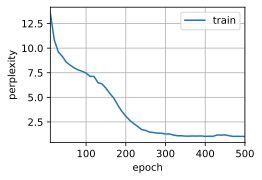

In [24]:
num_epochs, lr = 500, 1
train_ch8(model, train_iter, vocab, lr, num_epochs, d2l.try_gpu())

Cuối cùng, ta kiểm tra kết quả khi lấy mẫu ngẫu nhiên.

perplexity 1.3, 38063.6 tokens/sec on cuda:0
time traveller held in his hand was a glitteringmetallic framewo
traveller held in his hand was a glitteringmetallic framewo


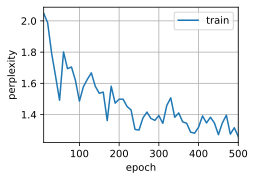

In [26]:
train_ch8(model, train_iter, vocab, lr, num_epochs, d2l.try_gpu(),
          use_random_iter=True)

Mặc dù học được nhiều điều từ việc lập trình từ đầu nhưng cách làm này không thực sự tiện lợi. Trong phần tiếp theo, ta sẽ tìm hiểu cách cải thiện đáng kể mô hình hiện tại, nhanh và dễ lập trình hơn.

### 8.5.7. Tóm tắt
* Mô hình chuỗi cần khởi tạo trạng thái cho quá trình huấn luyện.
* Giữa các mô hình chuỗi, ta cần đảm bảo tách gradient để chắc chắn rằng phép tính vi phân tự động không ảnh hưởng ra ngoài phạm vi mẫu hiện tại.
* Mô hình ngôn ngữ RNN đơn giản bao gồm một bộ mã hóa, một mô hình RNN và một bộ giải mã.
* Gọt gradient có thể hạn chế sự bùng nổ gradient nhưng không thể khắc phục được vấn đề tiêu biến gradient.
* Perplexity đánh giá chất lượng mô hình trên các chuỗi có độ dài khác nhau, được tính bằng trung bình lũy thừa của mất mát entropy chéo.
* Phân tách tuần tự cho kết quả mô hình tốt hơn.

### 8.5.8. Bài tập
1. Chỉ ra rằng mỗi biễu diễn one-hot tương đương với một embedding khác nhau cho từng đối tượng.
2. Điều chỉnh các siêu tham số để cải thiện perplexity.
    * Bạn có thể giảm perplexity xuống bao nhiêu? Hãy thay đổi embedding, số nút ẩn, tốc độ học, vv.
    * Mô hình này sẽ hoạt động tốt đến đâu trên các cuốn sách khác của H. G. Wells, ví dụ như [The War of the Worlds](https://www.gutenberg.org/ebooks/36).
3. Thay đổi hàm dự đoán bằng việc lấy mẫu thay vì chọn ký tự tiếp theo là ký tự có khả năng cao nhất.
    * Điều gì sẽ xảy ra?
    * Điều chỉnh để mô hình ưu tiên các đầu ra có khả năng cao hơn, ví dụ, bằng cách lấy mẫu sử dụng  $q(w_t \mid w_{t-1}, \ldots, w_1) \propto p^\alpha(w_t \mid w_{t-1}, \ldots, w_1)$  với  $α>1$ .
4. Điều gì sẽ xảy ra nếu ta chạy mã nguồn phần này mà không gọt gradient?
5. Thay đổi phép lấy mẫu phân tách tuần tự để các trạng thái ẩn không bị tách khỏi đồ thị tính toán. Thời gian chạy và độ chính xác có thay đổi không?
6. Thay hàm kích hoạt bằng ReLU và thực hiện lại các thử nghiệm.
7. Chứng minh rằng perplexity là nghịch đảo trung bình điều hòa (*harmonic mean*) của xác suất có điều kiện của từ.

## 8.6. Lập trình súc tích Mạng nơ-ron Hồi tiếp
Dù Section 8.5 đã mô tả cách lập trình mạng nơ-ron hồi tiếp từ đầu một cách chi tiết, tuy nhiên cách làm này không được nhanh và thuận tiện. Phần này sẽ hướng dẫn cách lập trình cùng một mô hình ngôn ngữ nhưng hiệu quả hơn bằng các hàm của deep learning framework. Như trước, ta cũng bắt đầu với việc đọc kho ngữ liệu “Cỗ máy Thời gian”.

In [1]:
from d2l import torch as d2l
import torch
from torch import nn
from torch.nn import functional as F

batch_size, num_steps = 32, 35
train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)

### 8.6.1. Định nghĩa Mô hình
Mô-đun rnn của Pytorch đã lập trình sẵn mạng nơ-ron hồi tiếp (cùng với các mô hình chuỗi khác). Ta xây dựng tầng hồi tiếp rnn_layer với một tầng ẩn có 256 nút rồi khởi tạo các trọng số.

In [3]:
num_hiddens = 256
rnn_layer = nn.RNN(len(vocab), num_hiddens)

state = torch.zeros((1, batch_size, num_hiddens))
state.shape

torch.Size([1, 32, 256])

Với một trạng thái ẩn và một đầu vào, chúng ta có thể tính toán đầu ra với trạng thái ẩn được cập nhật. Cần nhấn mạnh rằng “đầu ra” (`Y`) của `rnn_layer` không liên quan đến việc tính toán các lớp đầu ra: nó đề cập đến trạng thái ẩn tại mỗi bước thời gian và chúng có thể được sử dụng làm đầu vào cho lớp đầu ra tiếp theo.

In [4]:
X = torch.rand(size=(num_steps, batch_size, len(vocab)))
Y, state_new = rnn_layer(X, state)
Y.shape, state_new.shape

(torch.Size([35, 32, 256]), torch.Size([1, 32, 256]))

Tương tự Section 8.5, ta định nghĩa khối `RNNModel` bằng cách kế thừa lớp RNN. Chú ý rằng `rnn_layer` chỉ chứa các tầng hồi tiếp ẩn và ta cần tạo riêng biệt một tầng đầu ra, 

In [5]:
#@save
class RNNModel(nn.Module):
    """The RNN model."""
    def __init__(self, rnn_layer, vocab_size, **kwargs):
        super(RNNModel, self).__init__(**kwargs)
        self.rnn = rnn_layer
        self.vocab_size = vocab_size
        self.num_hiddens = self.rnn.hidden_size
        # If the RNN is bidirectional (to be introduced later),
        # `num_directions` should be 2, else it should be 1.
        if not self.rnn.bidirectional:
            self.num_directions = 1
            self.linear = nn.Linear(self.num_hiddens, self.vocab_size)
        else:
            self.num_directions = 2
            self.linear = nn.Linear(self.num_hiddens * 2, self.vocab_size)

    def forward(self, inputs, state):
        X = F.one_hot(inputs.T.long(), self.vocab_size)
        X = X.to(torch.float32)
        Y, state = self.rnn(X, state)
        # The fully connected layer will first change the shape of `Y` to
        # (`num_steps` * `batch_size`, `num_hiddens`). Its output shape is
        # (`num_steps` * `batch_size`, `vocab_size`).
        output = self.linear(Y.reshape((-1, Y.shape[-1])))
        return output, state

    def begin_state(self, device, batch_size=1):
        if not isinstance(self.rnn, nn.LSTM):
            # `nn.GRU` takes a tensor as hidden state
            return  torch.zeros((self.num_directions * self.rnn.num_layers,
                                 batch_size, self.num_hiddens),
                                device=device)
        else:
            # `nn.LSTM` takes a tuple of hidden states
            return (torch.zeros((
                self.num_directions * self.rnn.num_layers,
                batch_size, self.num_hiddens), device=device),
                    torch.zeros((
                        self.num_directions * self.rnn.num_layers,
                        batch_size, self.num_hiddens), device=device))

### 8.6.2. Huấn luyện và Dự đoán
Trước khi huấn luyện, hãy thử dự đoán bằng mô hình có trọng số ngẫu nhiên.

In [7]:
device = d2l.try_gpu()
model = RNNModel(rnn_layer, vocab_size=len(vocab))
model = model.to(device)
d2l.predict_ch8('time traveller', 10, model, vocab, device)

'time travellercr rcrcr r'

Khá rõ ràng, mô hình này không tốt. Tiếp theo, ta gọi hàm train_ch8 với các siêu tham số định nghĩa trong Section 8.5 để huấn luyện mô hình.

perplexity 1.3, 242087.7 tokens/sec on cuda:0
time travellerit would be cemarkable than a saillasper che soont
traveller abs ane dore with ugal it our wi h a ofaling tark


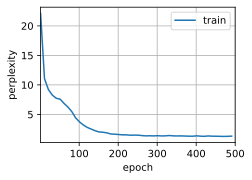

In [8]:
num_epochs, lr = 500, 1
d2l.train_ch8(model, train_iter, vocab, lr, num_epochs, device)

So với phần trước, mô hình này đạt được perplexity tương đương, nhưng thời gian huấn luyện tốt hơn do các đoạn mã được tối ưu hơn.

### 8.6.3. Tóm tắt
* Mô-đun rnn của deep learning framework đã lập trình sẵn tầng mạng nơ-ron hồi tiếp.
* Mỗi thực thể của nn.RNN trả về đầu ra và trạng thái ẩn sau lượt truyền xuôi. Lượt truyền xuôi này không bao gồm tính toán tại tầng đầu ra.
* Như trước, đồ thị tính toán cần được tách khỏi các bước trước đó để đảm bảo hiệu năng.

### 8.6.4. Bài tập
1. So sánh với cách lập trình từ đầu ở phần trước.
    * Tại sao lập trình bằng Gluon chạy nhanh hơn?
    * Nếu bạn nhận thấy khác biệt đáng kể nào khác ngoài tốc độ, hãy thử tìm hiểu tại sao.
2. Bạn có thể làm quá khớp mô hình này không? Hãy thử
    * Tăng số nút ẩn.
    * Tăng số vòng lặp.
    * Thay đổi tham số gọt (clipping) thì sao?
3. Hãy lập trình mô hình tự hồi quy ở phần giới thiệu của chương này bằng RNN.
4. Nếu tăng số tầng ẩn của mô hình RNN thì sao? Bạn có thể làm mô hình hoạt động không?
5. Có thể nén văn bản bằng cách sử dụng mô hình này không?
    * Nếu có thì cần bao nhiêu bit?
    * Tại sao không ai sử dụng mô hình này để nén văn bản? Gợi ý: bản thân bộ nén thì sao?

## 8.7. Lan truyền Ngược qua Thời gian
Cho đến nay chúng ta liên tục nhắc đến những vấn đề như *bùng nổ gradient*, *tiêu biến gradient*, *cắt xén lan truyển ngược* và sự cần thiết của việc *tách đồ thị tính toán*. Ví dụ, trong phần trước chúng ta gọi hàm `s.detach()` trên chuỗi. Vì muốn nhanh chóng xây dựng và quan sát cách một mô hình hoạt động nên những vấn đề này chưa được giải thích một cách đầy đủ. Trong phần này chúng ta sẽ nghiên cứu sâu và chi tiết hơn về lan truyền ngược cho các mô hình chuỗi và giải thích nguyên lý toán học đằng sau. Để hiểu chi tiết hơn về tính ngẫu nhiên và lan truyền ngược, hãy tham khảo bài báo [Tallec & Ollivier, 2017].

Chúng ta đã thấy một vài hậu quả của bùng nổ gradient khi lập trình mạng nơ-ron hồi tiếp (Section 8.5). Cụ thể, nếu bạn đã làm xong bài tập ở phần đó, bạn sẽ thấy rằng việc gọt gradient đóng vai trò rất quan trọng để đảm bảo mô hình hội tụ. Để có cái nhìn rõ hơn về vấn đề này, trong phần này chúng ta sẽ xem xét cách tính gradient cho các mô hình chuỗi. Lưu ý rằng, về mặt khái niệm thì không có gì mới ở đây. Sau cùng, chúng ta vẫn chỉ đơn thuần áp dụng các quy tắc dây chuyền để tính gradient. Tuy nhiên, việc ôn lại lan truyền ngược (Section 4.7) vẫn rất hữu ích.

Lượt truyền xuôi trong mạng nơ-ron hồi tiếp tương đối đơn giản. *Lan truyền ngược qua thời gian* thực chất là một ứng dụng cụ thể của lan truyền ngược trong mạng nơ-ron hồi tiếp. Nó đòi hỏi chúng ta mở rộng mạng nơ-ron hồi tiếp theo từng bước thời gian một để thu được sự phụ thuộc giữa các biến mô hình và các tham số. Sau đó, dựa trên quy tắc dây chuyền, chúng ta áp dụng lan truyền ngược để tính toán và lưu các giá trị gradient. Vì chuỗi có thể khá dài nên sự phụ thuộc trong chuỗi cũng có thể rất dài. Ví dụ, đối với một chuỗi gồm 1000 ký tự, ký tự đầu tiên có thể ảnh hưởng đáng kể tới ký tự ở vị trí 1000. Điều này không thực sự khả thi về mặt tính toán (cần quá nhiều thời gian và bộ nhớ) và nó đòi hỏi hơn 1000 phép nhân ma trận-vector trước khi thu được các giá trị gradient khó nắm bắt này. Đây là một quá trình chứa đầy sự bất định về mặt tính toán và thống kê. Trong phần tiếp theo chúng ta sẽ làm sáng tỏ những gì sẽ xảy ra và cách giải quyết vấn đề này trong thực tế.

### 8.7.1. Mạng Hồi tiếp Giản thể
Hãy bắt đầu với một mô hình đơn giản về cách mà mạng RNN hoạt động. Mô hình này bỏ qua các chi tiết cụ thể của trạng thái ẩn và cách trạng thái này được cập nhật. Những chi tiết này không quan trọng đối với việc phân tích dưới đây mà chỉ khiến các ký hiệu trở nên lộn xộn và phức tạp quá mức. Trong mô hình đơn giản này, chúng ta ký hiệu  $h_t$  là trạng thái ẩn,  $x_t$  là đầu vào, và  $o_t$  là đầu ra tại bước thời gian  $t$ . Bên cạnh đó,  $w_h$  và  $w_o$  tương ứng với trọng số của các trạng thái ẩn và tầng đầu ra. Kết quả là, các trạng thái ẩn và kết quả đầu ra tại mỗi bước thời gian có thể được giải thích như sau

<center>$h_t = f(x_t, h_{t-1}, w_h) \text{ và } o_t = g(h_t, w_o)$</center>

Do đó, chúng ta có một chuỗi các giá trị $\{\ldots, (h_{t-1}, x_{t-1}, o_{t-1}), (h_{t}, x_{t}, o_t), \ldots\}$  phụ thuộc vào nhau thông qua phép tính đệ quy. Lượt truyền xuôi khá đơn giản. Những gì chúng ta cần là lặp qua từng bộ ba  $(x_t,h_t,o_t)$  một. Sau đó, sự khác biệt giữa kết quả đầu ra  $o_t$  và các giá trị mục tiêu mong muốn  $y_t$  được tính bằng một hàm mục tiêu

<center>$L(x, y, w_h, w_o) = \sum_{t=1}^T l(y_t, o_t)$</center>

Đối với lan truyền ngược, mọi thứ lại phức tạp hơn một chút, đặc biệt là khi chúng ta tính gradient theo các tham số  $w_h$  của hàm mục tiêu  $L$ . Cụ thể, theo quy tắc dây chuyền ta có

<center>$\begin{split}\begin{aligned}
\partial_{w_h} L & = \sum_{t=1}^T \partial_{w_h} l(y_t, o_t) \\
    & = \sum_{t=1}^T \partial_{o_t} l(y_t, o_t) \partial_{h_t} g(h_t, w_h) \left[ \partial_{w_h} h_t\right].
\end{aligned}\end{split}$</center>

Ta có thể tính phần đầu tiên và phần thứ hai của đạo hàm một cách dễ dàng. Phần thứ ba $\partial_{w_h} h_t$ khiến mọi thứ trở nên khó khăn, vì chúng ta cần phải tính toán ảnh hưởng của các tham số tới  $h_t$ .

Để tính được gradient ở trên, giả sử rằng chúng ta có ba chuỗi  ${a_t},{b_t},{c_t}$  thỏa mãn  $a_0=0,a_1=b_1$  và  $a_{t}=b_{t}+c_{t}a_{t-1}$  với  $t=1,2,… $. Sau đó, với $ t≥1$  ta có

<center>$a_{t}=b_{t}+\sum_{i=1}^{t-1}\left(\prod_{j=i+1}^{t}c_{j}\right)b_{i}$</center>

Bây giờ chúng ta áp dụng (8.7.4) với

<center>$a_t = \partial_{w_h}h_{t}$</center>

<center>$b_t = \partial_{w_h}f(x_{t},h_{t-1},w_h)$</center>

<center>$c_t = \partial_{h_{t-1}}f(x_{t},h_{t-1},w_h)$</center>

Vì vậy, công thức  $a_{t}=b_{t}+c_{t}a_{t-1}$  trở thành phép đệ quy dưới đây

<center>$\partial_{w_h}h_{t}=\partial_{w_h}f(x_{t},h_{t-1},w)+\partial_{h}f(x_{t},h_{t-1},w_h)\partial_{w_h}h_{t-1}$</center>

Sử dụng (8.7.4), phần thứ ba sẽ trở thành

<center>$\partial_{w_h}h_{t}=\partial_{w_h}f(x_{t},h_{t-1},w_h)+\sum_{i=1}^{t-1}\left(\prod_{j=i+1}^{t}\partial_{h_{j-1}}f(x_{j},h_{j-1},w_h)\right)\partial_{w_h}f(x_{i},h_{i-1},w_h)$</center>

Dù chúng ta có thể sử dụng quy tắc dây chuyền để tính $\partial_w h_t$  một cách đệ quy, dây chuyền này có thể trở nên rất dài khi giá trị  t  lớn. Hãy cùng thảo luận về một số chiến lược để giải quyết vấn đề này.

* **Tính toàn bộ tổng**. Cách này rất chậm và gradient có thể bùng nổ vì những thay đổi nhỏ trong các điều kiện ban đầu cũng có khả năng ảnh hưởng đến kết quả rất nhiều. Điều này tương tự như trong hiệu ứng cánh bướm, khi những thay đổi rất nhỏ trong điều kiện ban đầu dẫn đến những thay đổi không cân xứng trong kết quả. Đây thực sự là điều không mong muốn khi xét tới mô hình mà chúng ta muốn ước lượng. Sau cùng, chúng ta đang cố tìm kiếm một bộ ước lượng mạnh mẽ và có khả năng khái quát tốt. Do đó chiến lược này hầu như không bao giờ được sử dụng trong thực tế.
* **Cắt xén tổng sau  $τ$  bước**. Cho đến giây phút hiện tại, đây là những gì chúng ta đã thảo luận. Điều này dẫn tới một phép xấp xỉ của gradient, đơn giản bằng cách kết thúc tổng trên tại  $\partial_w h_{t-\tau}$. Do đó lỗi xấp xỉ là  $\partial_h f(x_t, h_{t-1}, w) \partial_w h_{t-1}$ (nhân với tích của gradient liên quan đến $\partial_h f$ ). Trong thực tế, chiến lược này hoạt động khá tốt. Phương pháp này thường được gọi là BPTT (backpropagation through time — lan truyền ngược qua thời gian) bị cắt xén. Một trong những hệ quả của phương pháp này là mô hình sẽ tập trung chủ yếu vào ảnh hưởng ngắn hạn thay vì dài hạn. Đây thực sự là điều mà chúng ta mong muốn, vì nó hướng sự ước lượng tới các mô hình đơn giản và ổn định hơn.
* **Cắt xén Ngẫu nhiên**. Cuối cùng, chúng ta có thể thay thế  $\partial_{w_h} h_t$  bằng một biến ngẫu nhiên có giá trị kỳ vọng đúng nhưng vẫn cắt xén chuỗi.
* Điều này có thể đạt được bằng cách sử dụng một chuỗi các  $\xi_t$  trong đó  $E[\xi_t] = 1$ , $P(\xi_t = 0) = 1-\pi$  và  $P(\xi_t = \pi^{-1}) = \pi$.
* Chúng ta sẽ sử dụng chúng thay vì gradient:

<center>$z_t  = \partial_w f(x_t, h_{t-1}, w) + \xi_t \partial_h f(x_t, h_{t-1}, w) \partial_w h_{t-1}$</center>

Từ định nghĩa của  $\xi_t$, ta có  $E[z_t] = \partial_w h_t$ . Bất cứ khi nào  $\xi_t = 0$ , khai triển sẽ kết thúc tại điểm đó. Điều này dẫn đến một tổng trọng số của các chuỗi có chiều dài biến thiên, trong đó chuỗi dài sẽ hiếm hơn nhưng được đánh trọng số cao hơn tương ứng. [Tallec & Ollivier, 2017](https://arxiv.org/abs/1705.08209) đưa ra đề xuất này trong bài báo nghiên cứu của họ. Không may, dù phương pháp này khá hấp dẫn về mặt lý thuyết, nó lại không tốt hơn phương pháp cắt xén đơn giản, nhiều khả năng do các yếu tố sau. Thứ nhất, tác động của một quan sát đến quá khứ sau một vài lượt lan truyền ngược đã là tương đối đủ để nắm bắt các phụ thuộc trên thực tế. Thứ hai, phương sai tăng lên làm phản tác dụng của việc có gradient chính xác hơn. Thứ ba, ta thực sự muốn các mô hình có khoảng tương tác ngắn. Do đó, BPTT có một hiệu ứng điều chuẩn nhỏ mà có thể có ích.

![](images/truncated-bptt.svg)

<center>Fig. 8.7.1 Từ trên xuống dưới: BPTT ngẫu nhiên, BPTT bị cắt xén đều và BPTT đầy đủ</center>

Fig. 8.7.1 minh họa ba trường hợp trên khi phân tích một số từ đầu tiên trong Cỗ máy Thời gian:

* Dòng đầu tiên biểu diễn sự cắt xén ngẫu nhiên, chia văn bản thành các phần có độ dài biến thiên.
* Dòng thứ hai biểu diễn BPTT bị cắt xén đều, chia văn bản thành các phần có độ dài bằng nhau.
* Dòng thứ ba là BPTT đầy đủ, dẫn đến một biểu thức không khả thi về mặt tính toán.

### 8.7.2. Đồ thị Tính toán
Để minh họa trực quan sự phụ thuộc giữa các biến và tham số mô hình trong suốt quá trình tính toán của mạng nơ-ron hồi tiếp, ta có thể vẽ đồ thị tính toán của mô hình, như trong Fig. 8.7.2. Ví dụ, việc tính toán trạng thái ẩn ở bước thời gian 3,  $h_3$ , phụ thuộc vào các tham số  $\mathbf{W}_{hx}$  và  $\mathbf{W}_{hh}$  của mô hình, trạng thái ẩn ở bước thời gian trước đó  $h_2$ , và đầu vào ở bước thời gian hiện tại  $x_3$ .

![](images/rnn-bptt.svg)

Fig. 8.7.2 Sự phụ thuộc về mặt tính toán của mạng nơ-ron hồi tiếp với ba bước thời gian. Ô vuông tượng trưng cho các biến (không tô đậm) hoặc các tham số (tô đậm), hình tròn tượng trưng cho các phép toán.

### 8.7.3. BPTT chi tiết
Sau khi thảo luận các nguyên lý chung, hãy phân tích BPTT một cách chi tiết. Bằng cách tách  $\mathbf{W}$  thành các tập ma trận trọng số khác nhau  $\mathbf{W}_{hx}, \mathbf{W}_{hh}$  và  $\mathbf{W}_{oh}$ ), ta thu được mô hình biến tiềm ẩn tuyến tính đơn giản:

<center>$\mathbf{h}_t = \mathbf{W}_{hx} \mathbf{x}_t + \mathbf{W}_{hh} \mathbf{h}_{t-1} \text{ và }
\mathbf{o}_t = \mathbf{W}_{oh} \mathbf{h}_t$</center>
 
Theo thảo luận ở Section 4.7, ta tính các gradient  $\frac{\partial L}{\partial \mathbf{W}_{hx}}$ ,  $\frac{\partial L}{\partial \mathbf{W}_{hh}}$ ,  $\frac{\partial L}{\partial \mathbf{W}_{oh}}$  cho

<center>$L(\mathbf{x}, \mathbf{y}, \mathbf{W}) = \sum_{t=1}^T l(\mathbf{o}_t, y_t)$</center>
 
với  $l(⋅)$  là hàm mất mát đã chọn trước. Tính đạo hàm theo $\mathbf{W}_{oh}$  khá đơn giản, ta có

<center>$\partial_{\mathbf{W}_{oh}} L = \sum_{t=1}^T \mathrm{prod}
\left(\partial_{\mathbf{o}_t} l(\mathbf{o}_t, y_t), \mathbf{h}_t\right)$</center>
 
với  $prod(⋅)$  là tích của hai hoặc nhiều ma trận.

Sự phụ thuộc vào  $\mathbf{W}_{hx}, \mathbf{W}_{hh}$  thì khó khăn hơn một chút vì cần sử dụng quy tắc dây chuyền khi tính toán đạo hàm. Ta sẽ bắt đầu với

<center>$\begin{split}\begin{aligned}
\partial_{\mathbf{W}_{hh}} L & = \sum_{t=1}^T \mathrm{prod}
\left(\partial_{\mathbf{o}_t} l(\mathbf{o}_t, y_t), \mathbf{W}_{oh}, \partial_{\mathbf{W}_{hh}} \mathbf{h}_t\right), \\
\partial_{\mathbf{W}_{hx}} L & = \sum_{t=1}^T \mathrm{prod}
\left(\partial_{\mathbf{o}_t} l(\mathbf{o}_t, y_t), \mathbf{W}_{oh}, \partial_{\mathbf{W}_{hx}} \mathbf{h}_t\right).
\end{aligned}\end{split}$</center>
 
Sau cùng, các trạng thái ẩn phụ thuộc lẫn nhau và phụ thuộc vào đầu vào quá khứ. Một đại lượng quan trọng là sư ảnh hưởng của các trạng thái ẩn quá khứ tới các trạng thái ẩn tương lai.

<center>$\partial_{\mathbf{h}_t} \mathbf{h}_{t+1} = \mathbf{W}_{hh}^\top
 $do đó$
\partial_{\mathbf{h}_t} \mathbf{h}_T = \left(\mathbf{W}_{hh}^\top\right)^{T-t}$</center>
 
Áp dụng quy tắc dây chuyền ta được

<center>$\begin{split}\begin{aligned}
\partial_{\mathbf{W}_{hh}} \mathbf{h}_t & = \sum_{j=1}^t \left(\mathbf{W}_{hh}^\top\right)^{t-j} \mathbf{h}_j \\
\partial_{\mathbf{W}_{hx}} \mathbf{h}_t & = \sum_{j=1}^t \left(\mathbf{W}_{hh}^\top\right)^{t-j} \mathbf{x}_j.
\end{aligned}\end{split}$</center>
 
Ta có thể rút ra nhiều điều từ biểu thức phức tạp này. Đầu tiên, việc lưu lại các kết quả trung gian, tức các luỹ thừa của $\mathbf{W}_{hh}$  khi tính các số hạng của hàm mất mát  $L$ , là rất hữu ích. Thứ hai, ví dụ tuyến tính này dù đơn giản nhưng đã làm lộ ra một vấn đề chủ chốt của các mô hình chuỗi dài: ta có thể phải làm việc với các luỹ thừa rất lớn của  $\mathbf{W}_{hh}^j$ . Trong đó, khi  $j$  lớn, các trị riêng nhỏ hơn  $1$  sẽ tiêu biến, còn các trị riêng lớn hơn  $1$  sẽ phân kì. Các mô hình này không có tính ổn định số học, dẫn đến việc chúng quan trọng hóa quá mức các chi tiết không liên quan trong quá khứ. Một cách giải quyết vấn đề này là cắt xén các số hạng trong tổng ở một mức độ thuận tiện cho việc tính toán. Sau này ở Section 9, ta sẽ thấy cách các mô hình chuỗi phức tạp như LSTM giải quyết vấn đề này tốt hơn. Khi lập trình, ta cắt xén các số hạng bằng cách tách rời gradient sau một số lượng bước nhất định.

### 8.7.4. Tóm tắt
* Lan truyền ngược theo thời gian chỉ là việc áp dụng lan truyền ngược cho các mô hình chuỗi có trạng thái ẩn.
* Việc cắt xén là cần thiết để thuận tiện cho việc tính toán và ổn định các giá trị số.
* Luỹ thừa lớn của ma trận có thể làm các trị riêng tiêu biến hoặc phân kì, biểu hiện dưới hiện tượng tiêu biến hoặc bùng nổ gradient.
* Để tăng hiệu năng tính toán, các giá trị trung gian được lưu lại.

### 8.7.5. Bài tập
1. Cho ma trận đối xứng  $\mathbf{M} \in \mathbb{R}^{n \times n}$  với các trị riêng  $λ_i$ . Không làm mất tính tổng quát, ta giả sử chúng được sắp xếp theo thứ tự tăng dần  $λ_i≤λ_{i+1}$ . Chứng minh rằng  $\mathbf{M}^k$  có các trị riêng là  $\lambda_i^k$ .
2. Chứng minh rằng với vector bất kì $\mathbf{x} \in \mathbb{R}^n$ , xác suất cao là  $\mathbf{M}^k \mathbf{x}$  sẽ xấp xỉ vector trị riêng lớn nhất $\mathbf{v}_n$  của $\mathbf{M}$ .
3. Kết quả trên có ý nghĩa như thế nào khi tính gradient của mạng nơ-ron hồi tiếp?
4. Ngoài gọt gradient, có phương pháp nào để xử lý bùng nổ gradient trong mạng nơ-ron hồi tiếp không?